2장. 지도 학습

In [1]:
!pip3 install koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


 2.1 분류와 회귀

 2.2 일반화, 과대적합, 과소적합
 
 2.2.1 모델 복잡도와 데이터셋 사이즈의 관계

2.3 지도 학습 알고리즘

In [2]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


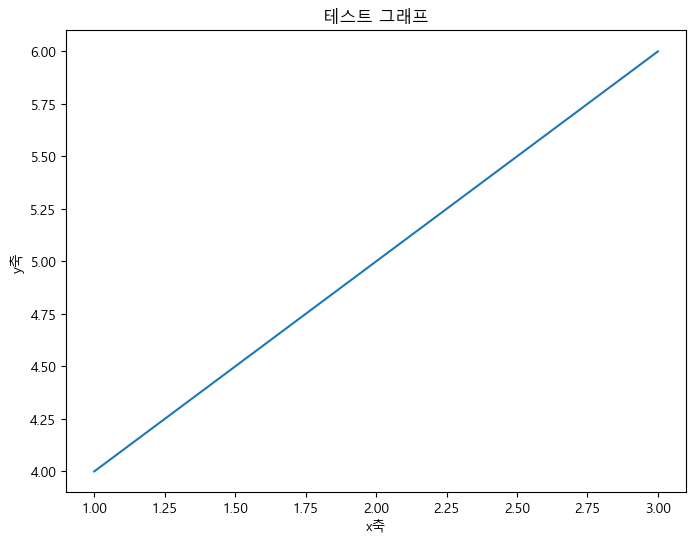

In [3]:
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm

# 폰트 설정
#plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='Malgun Gothic')
# 테스트
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("테스트 그래프")
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()


머신러닝을 처음 접하는 학습자에게 **분류(classification)**와 **회귀(regression)**의 차이를 직관적으로 설명할 수 있는 그래프

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트를 사용할 경우, 마이너스(-) 부호가 깨지는 현상


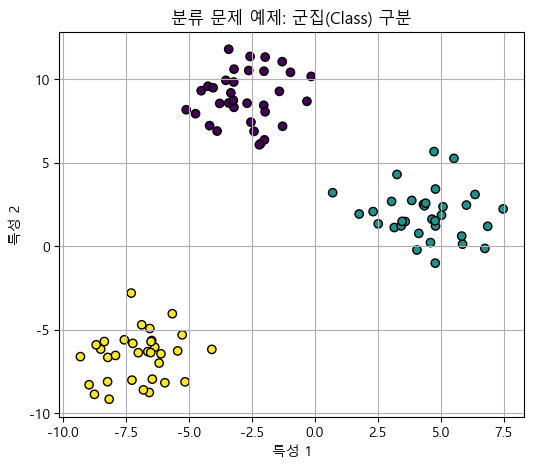

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("분류 문제 예제: 군집(Class) 구분")
plt.xlabel("특성 1")
plt.ylabel("특성 2")
plt.grid(True)
plt.show()


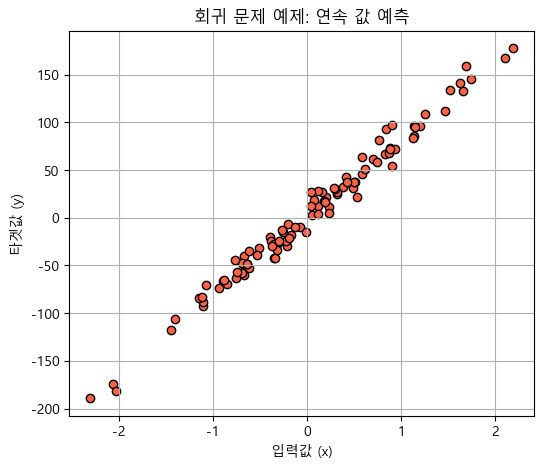

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)

plt.figure(figsize=(6, 5))
plt.scatter(X, y, c='tomato', edgecolors='k')
plt.title("회귀 문제 예제: 연속 값 예측")
plt.xlabel("입력값 (x)")
plt.ylabel("타겟값 (y)")
plt.grid(True)
plt.show()


2.2 일반화, 과대적합,과소적합

과소적합: 너무 단순한 직선 → 전체 패턴을 못 따라감

적절한 모델: 적당히 데이터를 잘 따라가는 곡선

과대적합: 너무 복잡한 곡선 → 훈련 데이터는 잘 맞지만 일반화 못함

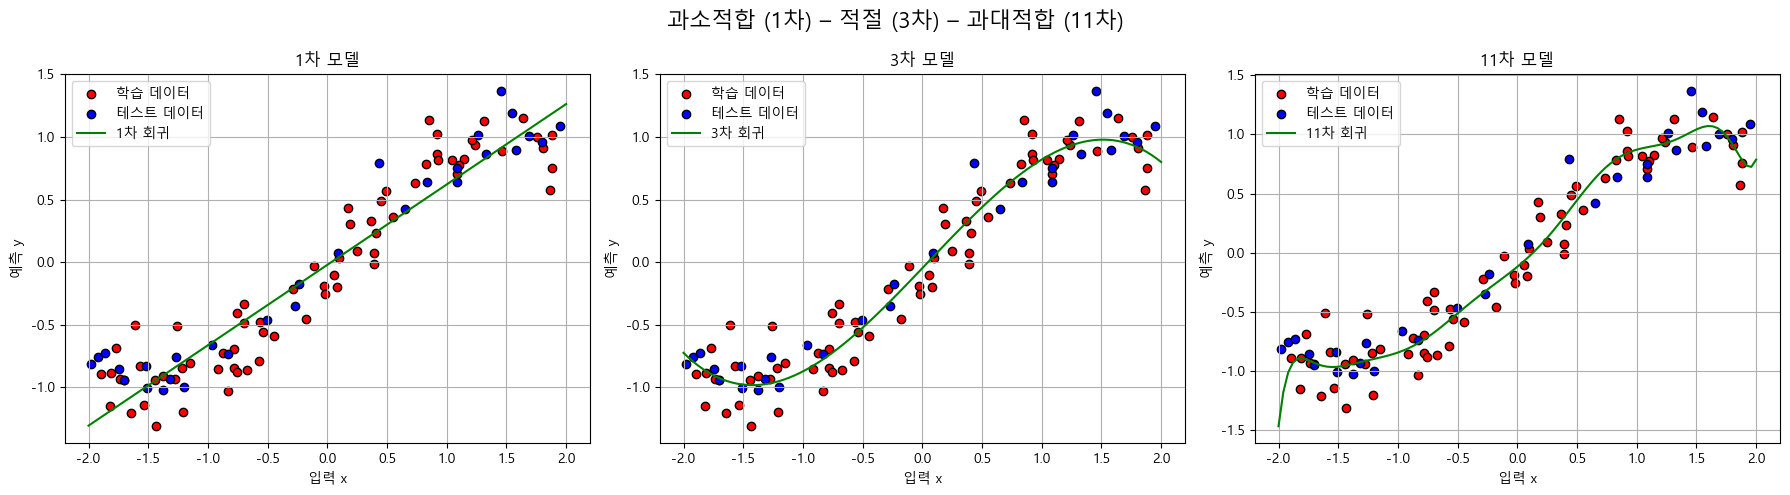

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 시드 고정
np.random.seed(42)

# 전체 데이터 생성
X = np.sort(np.random.rand(100, 1) * 4 - 2)  # [-2, 2]
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # 사인 + 노이즈

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 예측용 x 값
X_plot = np.linspace(-2, 2, 100).reshape(-1, 1)

# 모델 차수 목록 (1차, 3차, 11차)
degrees = [1, 3, 11]
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, c='red', edgecolor='k', label='학습 데이터')
    plt.scatter(X_test, y_test, c='blue', edgecolor='k', label='테스트 데이터')
    plt.plot(X_plot, y_plot, label=f"{degree}차 회귀", color='green')
    plt.title(f"{degree}차 모델")
    plt.xlabel("입력 x")
    plt.ylabel("예측 y")
    plt.grid(True)
    plt.legend()

plt.suptitle("과소적합 (1차) – 적절 (3차) – 과대적합 (11차)", fontsize=16)
plt.tight_layout()
plt.show()


2.2.1 모델 복잡도와 데이터세트 크기와의 관계

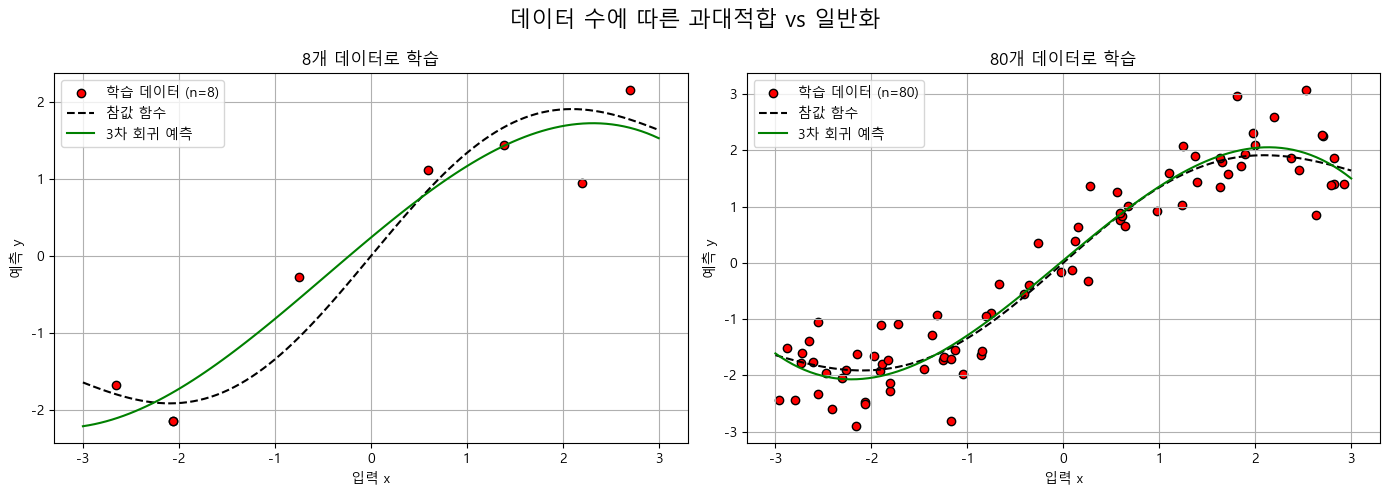

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 참값 함수 정의 (비선형)
def true_function(x):
    return np.sin(x) + 0.5 * x

# x 값 (예측용 범위)
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# 데이터 수: 적은 경우 vs 많은 경우
sample_sizes = [8, 80]  # 과대적합 vs 일반화
degree = 3  # 동일한 복잡도(3차 모델) 사용

plt.figure(figsize=(14, 5))

for i, n_samples in enumerate(sample_sizes):
    np.random.seed(42)
    X = np.sort(np.random.rand(n_samples, 1) * 6 - 3)  # [-3, 3] 범위
    y = true_function(X).ravel() + np.random.normal(0, 0.5, n_samples)  # 노이즈 포함

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_plot)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X, y, color='red', edgecolor='k', label=f"학습 데이터 (n={n_samples})")
    plt.plot(X_plot, true_function(X_plot), label="참값 함수", linestyle='--', color='black')
    plt.plot(X_plot, y_pred, label=f"{degree}차 회귀 예측", color='green')
    plt.title(f"{n_samples}개 데이터로 학습")
    plt.xlabel("입력 x")
    plt.ylabel("예측 y")
    plt.grid(True)
    plt.legend()

plt.suptitle("데이터 수에 따른 과대적합 vs 일반화", fontsize=16)
plt.tight_layout()
plt.show()


2.3 지도 학습 알고리즘 

In [9]:
!pip3 install mglearn


Defaulting to user installation because normal site-packages is not writeable


In [10]:
import mglearn

X.shape: (26, 2)


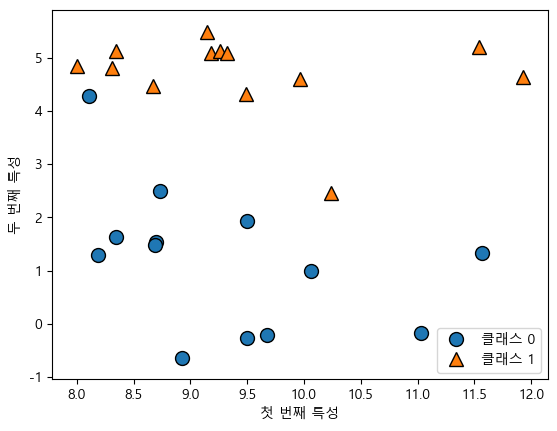

In [11]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

numpy.ndarray는 머신러닝의 핵심 데이터 구조

모든 데이터 전처리, 모델 입력, 연산은 대부분 이 구조에서 시작되므로 기초부터 정확히 이해하는 것이 매우 중요

In [12]:
print(X.shape,y.shape)
print(type(X), type(y))
print(X.ndim, X.size)
print(len(X)) #len, size 구분
print(X[:5])

(26, 2) (26,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2 52
26
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]


In [13]:
# 인덱싱과 슬라이싱 
print(X[0:2])
print(X[0:2,:])

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]]
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]]


In [14]:
print(X+10) # 브로드캐스팅
print(X.mean(axis=0)) # 벡터 연산 - 각 열의 평균

[[19.96346605 14.59676542]
 [21.0329545   9.83183283]
 [21.54155807 15.21116083]
 [18.69289001 11.54322016]
 [18.1062269  14.28695977]
 [18.30988863 14.80623966]
 [21.93027136 14.64866327]
 [19.67284681  9.79716835]
 [18.34810316 15.13415623]
 [18.67494727 14.47573059]
 [19.17748385 15.09283177]
 [20.24028948 12.45544401]
 [18.68937095 11.48709629]
 [18.92229526  9.36006775]
 [19.49123469 14.33224792]
 [19.25694192 15.13284858]
 [17.99815287 14.8525051 ]
 [18.18378052 11.29564214]
 [18.7337095  12.49162431]
 [19.32298256 15.09840649]
 [20.06393839 10.99078055]
 [19.50048972  9.73569682]
 [18.34468785 11.63824349]
 [19.50169345 11.93824624]
 [19.15072323 15.49832246]
 [21.563957   11.3389402 ]]
[9.40057246 2.96426312]


In [15]:
print(y.shape)
y2 = y.reshape(-1,1)# 벡터 -> 행렬로 변환
print(y2.shape)
y4 = y2.flatten() # 행렬 -> 벡터로 변환
print(y4.shape)

(26,)
(26, 1)
(26,)


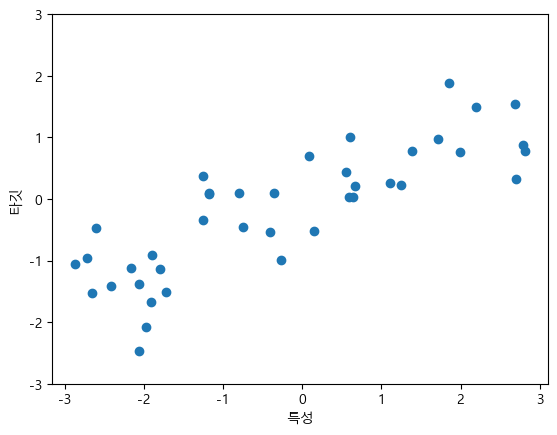

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show() # 책에는 없음

In [17]:
print(X[:5])
print(X.shape)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
(40, 1)


In [18]:
y[:10]

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153])

# 위스콘신 유방암 데이터세트 

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# <class 'sklearn.utils._bunch.Bunch'>는 사이킷런(sklearn)에서 데이터셋을 반환할 때 자주 등장하는 구조
# 파이썬의 딕셔너리(dict)와 유사한 자료 구조
# Bunch는 scikit-learn에서 사용하는 속성(Attribute) 기반 딕셔너리
print(type(cancer))
print("cancer.keys():\n", cancer.keys())

<class 'sklearn.utils._bunch.Bunch'>
cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Bunch 객체의 특징

딕셔너리처럼 key로 접근할 수 있음 - cancer['target']

객체처럼 .속성으로도 접근할 수 있음 - cancer.data

In [20]:
print("유방암 데이터의 형태:", cancer.data.shape)
print(cancer['target'].shape)

유방암 데이터의 형태: (569, 30)
(569,)


In [21]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [22]:
print("클래스별 샘플 갯수:\n",
      {str(n): int(v) for n, v in zip(cancer.target_names, np.bincount(cancer.target))})


클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [23]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Boston Housing 가격 데이터세트

- 범죄율, 찰스강 인접도, 고속도로 접근성 등을 이용한 주택 가격 예측

**한 샘플(주택)**의 데이터가 두 줄에 걸쳐 저장됨

1줄: 12개 특성

2줄: 2개 특성 + 목표값(타깃)

In [24]:
import pandas as pd
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 다음과 같이 코드를 수정합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # 슬라이싱 코드를 이해하는 것이 필요 
##   # 짝수 번째 행 (0, 2, 4, ...) → 12개 특성
##   # 홀수 번째 행 (1, 3, 5, ...) → 앞 2개 특성
target = raw_df.values[1::2, 2] # # 홀수 번째 행의 세 번째 값 → 타깃 값
print("데이터의 형태:", data.shape)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_21240\4247420192.py:4: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


데이터의 형태: (506, 13)


In [25]:
## 특성 공학으로 유도된 데이터세트: 특성이 13개에서 104개로 확장됨 > 4장 특성공학에 다룸, 교재 62페이지 설명
X, y = mglearn.datasets.load_extended_boston() # 특성 공학 적용 > 특성 추가됨 
print("X.shape:", X.shape)

X.shape: (506, 104)


2.3.2 k-최근접 이웃

k-최근접 이웃 분류

K-최근접 이웃(K-Nearest Neighbors, K-NN)은 **지도학습(Supervised Learning)**의 대표적인 알고리즘.
- "가까운 이웃들의 레이블을 참고하여 새로운 데이터를 예측"


개념 요약: 
- 어떤 새로운 데이터가 주어졌을 때,

- 훈련 데이터 중 가장 가까운 K개의 이웃을 찾고,

- 그 이웃들의 레이블로부터 예측을 수행

- 분류 문제: K개 중 가장 많은 클래스를 선택 (다수결)

- 회귀 문제: K개 값의 평균을 예측값으로 사용




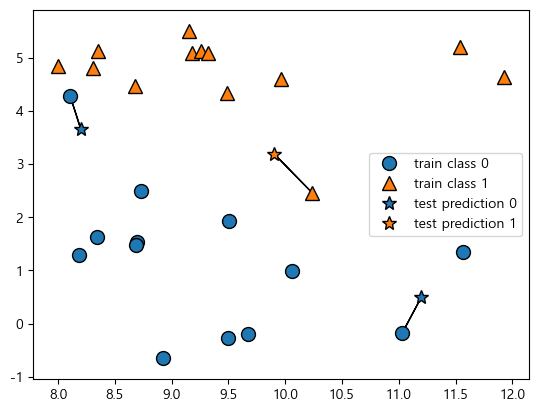

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 다수결로 분류

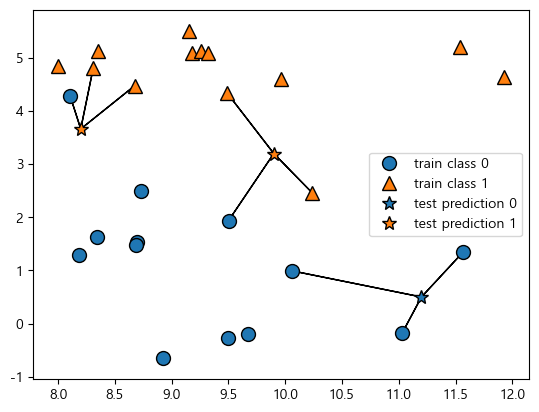

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

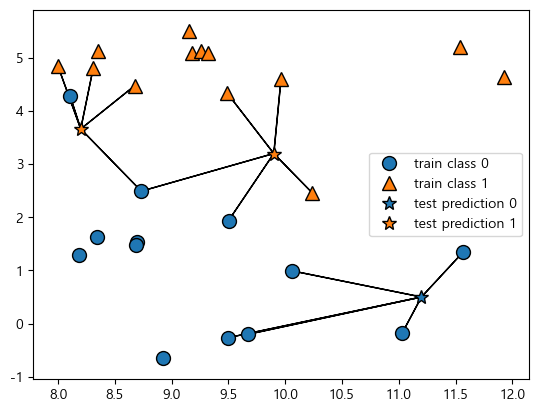

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [29]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() # 교재 58 페이지 - 이진 분류 데이터세트

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X.shape

(26, 2)

KNN (K-Nearest Neighbors) 이란?

- K-최근접 이웃 분류기(KNN 분류기)는 학습이 아니라 기억(Memorization)을 하는 모델.
- 어떤 데이터가 들어왔을 때, 가장 가까운 데이터 K개를 찾고 그 이웃들이 가장 많이 속한 클래스로 예측

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [34]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


#### KNeighborsClassifier 분석 (p66)

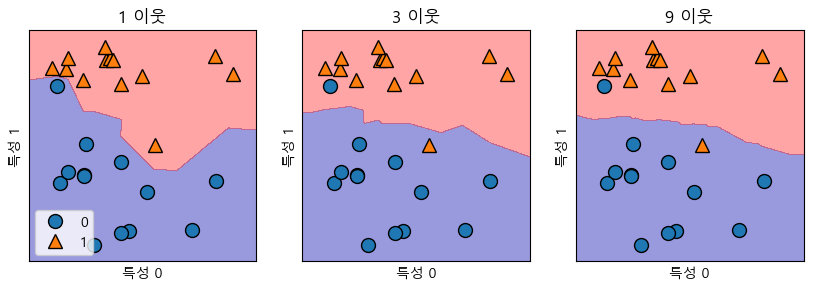

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes): #1,3,9는 이웃 숫자  > 59페이지 그림 2-2를 보아야 이해가 된다 
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)#결정경계: 클래스 0과 1의 구분
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show() # 책에는 없음

- 9 이웃: 모델이 단순 > 복잡도가 낮아진다 

- 1 이웃: 모델이 복잡 

### 모델의 복잡도와 일반화 사이의 관계

- 실제 데이터(유방암 데이터세트)를 사용한 분류 분석

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(

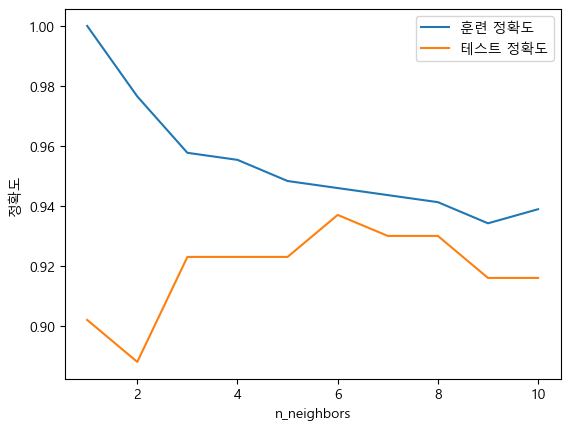

In [36]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 교재 60 페이지 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() # 책에는 없음

- 이웃의 숫자가 적을 때: 모델이 복잡 > 훈련 정확도 높다 > 테스트 정확도 낮다
- 이웃의 숫자가 많을 때:  모델이 단순해짐 > 훈련 정확도 떨어진다 

#### k-최근접 이웃 회귀

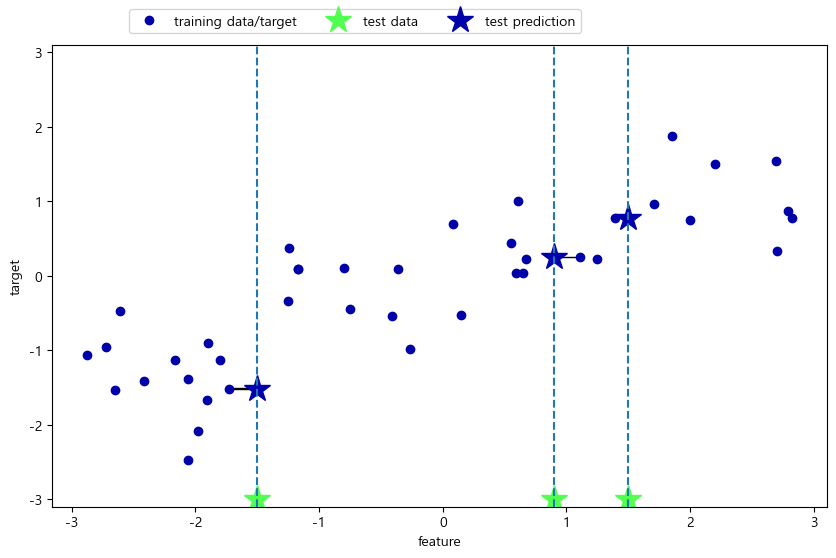

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1) #교재 59페이지의 wave 데이터세트
# mglearn.plots.plot_knn_regression(n_neighbors=1) 함수는 
# 59페이지에서 설명하는 wave 데이터셋에 대해 KNN 회귀모델을 학습하고, 그 결과를 시각화하는 함수

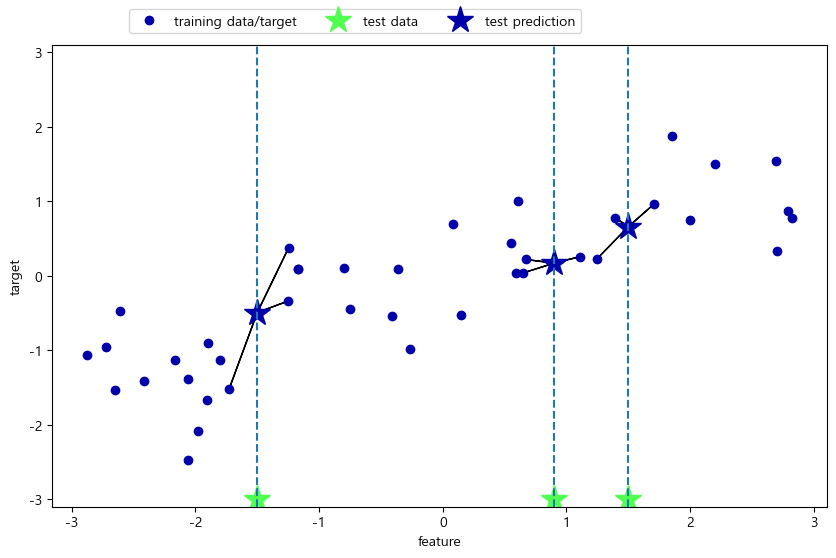

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


구글링: 결정 계수의 의미와 계산 방법, 여울, 20.8.9, https://m.blog.naver.com/tlrror9496/222055889079

- 결정계수: R 제곱 R square = SSE/SST = 1 - SSR/SST (1- 설명 안되는 분산/총분산)
- 1이면 독립변수가 종속변수를 잘 설명한다 

In [41]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

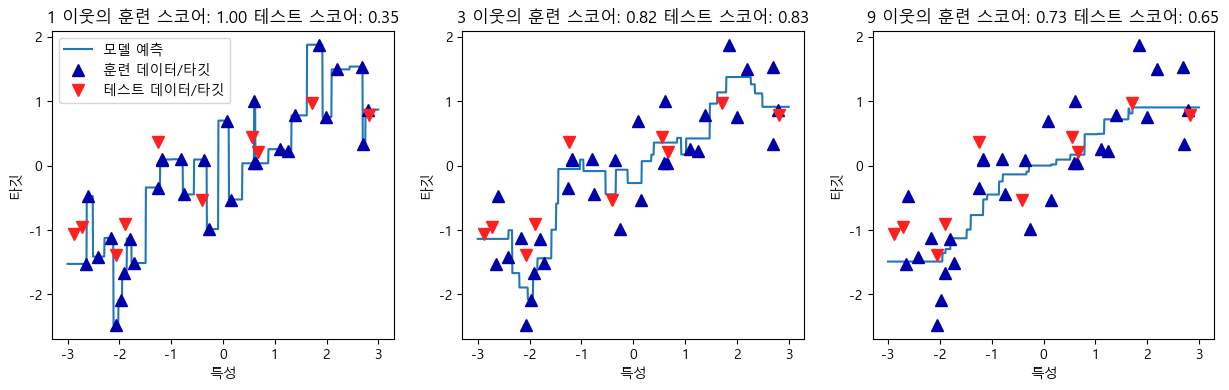

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show() # 책에는 없음

#### 장단점과 매개변수
- 이웃 1개: 예측값이 훈련데이터 포인트를 모두 지나간다 > 과대 적합 > 테스트 스코어 낮다

- 최근접 이웃 모델: 훈련세트가 크면 느리다, 특성이 많을 때 잘 동작하지 않는다  >> 대안: 선형 모델 

### 2.3.3. 선형 모델

#### 회귀의 선형 모델(74페이지)

벡터 내적:product > 모델의 예측, 손실 계산, 신경망의 출력 등 거의 모든 연산의 기반
- 벡터 내적이란? 각 원소끼리 곱하고 모두 더한 것 → 결과는 스칼라(숫자 하나)

  a = (a1,a2), b = (b1,b2)
  a.b = a1b1 + a2b2

NumPy에서 벡터 내적 계산 방법


In [43]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([2, 1, 3])

# 방법 1: np.dot
print(np.dot(a, b))   # 출력: 32

# 방법 2: @ 연산자 (Python 3.5+)
print(a @ b)          # 출력: 32

# 방법 3: a.dot(b)
print(a.dot(b))       # 출력: 32


13
13
13


머신러닝에서 X=(3,1), w=(3,)일 때 >3은 특성 갯수 
 -   y = w0 * x0 + w1 * x1 + w2 *x2 +b 회귀식

  y = XT.X + b (XT는 X의 전치)

머신러닝에서 선형 모델 예측 :

y = XT.w + b # x는 열 벡터(3×1 행렬)이어야 수학적으로 맞다
#74페이지: 회귀 선형 모델 수식 

In [44]:
import numpy as np

# 입력 벡터 x (세 특성)
x = np.array([[1], [2], [3]])     # shape (3,1)
w = np.array([[0.1, 0.2, 0.3]])   # shape (1,3)
b = 1.0

# 내적 연산
y = w @ x + b    # (1,3) @ (3,1) + scalar → (1,1)
print(y)         # [[2.4]]


[[2.4]]


In [45]:
X = np.array([[1, 2, 3],
              [4, 5, 6]])      # shape (2,3) - 2개의 샘플 (레코드), 각 샘플마다 3개의 특성
w = np.array([[0.1], [0.2], [0.3]])  # shape (3,1) - 각 특성에 대한 가중치 (w₀, w₁, w₂)

y = X @ w   # shape (2,1) - 각 샘플에 대한 예측값 총 2개
print(y)

[[1.4]
 [3.2]]


y₁ = 1*0.1 + 2*0.2 + 3*0.3 = 0.1 + 0.4 + 0.9 = 1.4  
y₂ = 4*0.1 + 5*0.2 + 6*0.3 = 0.4 + 1.0 + 1.8 = 3.2


w[0]: 0.393906  b: -0.031804


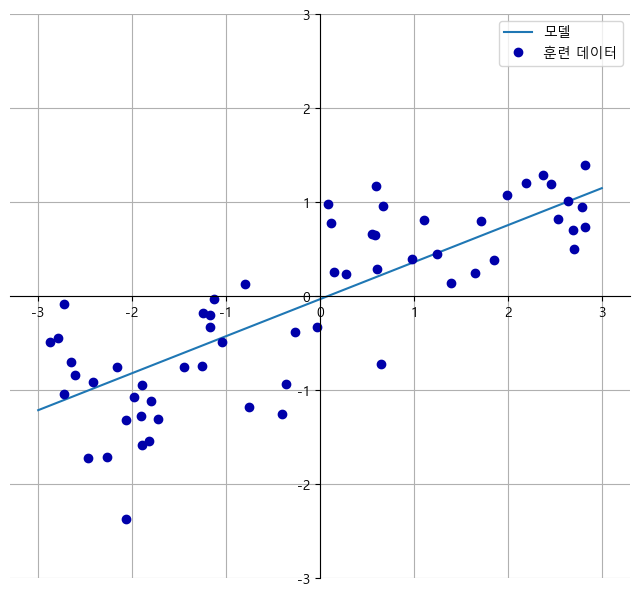

In [46]:
# 1차원 wave 데이터세트에 대하여 w[0], b를 사용하여 직선으로 학습
# y = w[0].x + b ## w[0] = 0.4
# 특성이 1개면 직선, 특성 2개면 평면, 더 높은 차원(특성이 3개 이상) 초평면(hyperplane)
mglearn.plots.plot_linear_regression_wave()

[딥러닝] 선형회귀 Linear Regression - 최소제곱법, 평균제곱오차, 경사하강법, 멍개, 21.2.20, https://m.blog.naver.com/pjt3591oo/222250225034

선형 회귀(최소제곱법)

- y = wx + b # 학습으로 w,b를 찾는다 

In [47]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [48]:
print("lr.coef_:", lr.coef_) # lr.coef_ 변수(변수명 마지막에 밑줄)는 훈련 데이터에서 유도된 속성 
# wave 데이터세트의 특성 1개 > 유도된 coef는 기울기/가중치 1개
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


결정계수(R^2)의 이해, 노마프분석가, 22.3.8, https://diseny.tistory.com/entry/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98R2%EC%9D%98-%EC%9D%B4%ED%95%B4?category=906035

In [49]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train))) # 과소적합 - 훈련세트 점수 = 테스트 세트 점수 < 특성 1개
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test))) #R-square

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [50]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [51]:
print(X.shape) #특성이 104 > 고차원 데이터세트 > 과대적합

(506, 104)


In [52]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train))) #과대 적합 - 유도된 특성 104개
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test))) # 모델 복잡도를 제어할 수 있는 모델 사용 > 리지 회귀

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 리지 회귀

ridge:  산마루, 산등성이 - elevated body part or structure
- 해석: 복잡한 골짜기를 숨긴다
- ridge는 최적화 함수의 형태에서 유래한 용어
 > 제약조건 sum(w^2) < t를 만족하도록 최적화면 등고선이 원 또는 타원형 형태의 구릉 지형(ridge-like shape) 형성

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) #default 알파값은 1
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) # LinearRegression() 보다 테스트 점수가 좋아진다 

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


[정규화(regulation)와 Ridge Regression,yuns_u·2021년 8월 11일, ](https://velog.io/@yuns_u/Ridge-Regression)
- regulate: to control something, by making it work in a particular way
- 규제: 과대적합이 되지 않도록 모델을 강제로 제한 >wi을 0에 가깝게 만든다 >> L2 규제

In [54]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #비용함수 = sigma(yi-yi^)**2 + alpha *sigma(wi)**2
##alpha가 크면 wi는 더 0에 가까워져야 한다. > feature 숫자를 줄이는 효과를 갖는다 > 훈련세트 점수가 테스트 세트 점수와 비슷해짐 > 일반화 
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [55]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train) # alpha가 작으면 wi는 커지고 > 모델이 복잡해지고 >>LinearRegression() 비슷해진다
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.70


### 알파값에 따라 모델의 coef 속성이 어떻게 달라지는지 조사 

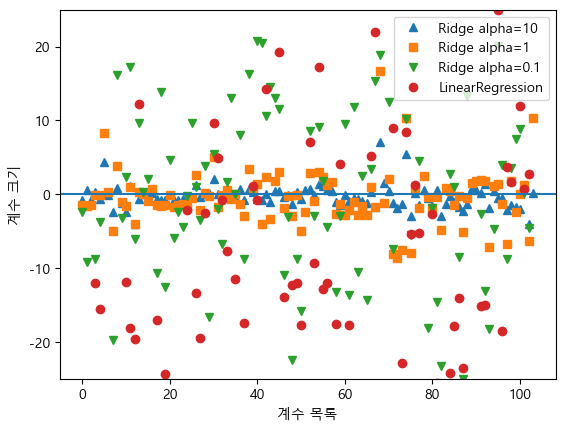

In [56]:
# 알파 값에 따라 각 가중치 값: y축, x축은 coef목록 > 각 특성을 말한다 

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") #알파가 크면 coef> 가중치는 0 근처에 분포
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")#LinearRegression() 비슷해지는 분포를 보인다 

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록") # coef들 > 특성들
plt.ylabel("계수 크기") # eocf 크기는 가중치 값을 말함
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() # 책에는 없음

## 알파 값을 고정하고 훈련 데이터세트의 크기 변화

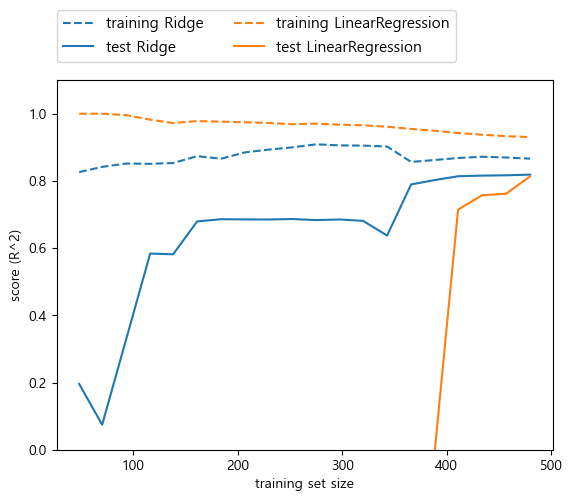

In [57]:
mglearn.plots.plot_ridge_n_samples() #보스톤 주택 가격에 대하여 알파 = 1에 대하여 데이터세트 크기 변화에 따른 R square 값 변화 
# 학습 곡선 - 데이터세트의 크기에 따른 모델의 성능 변화
# 1) 훈련 데이터세트의 성능이 테스트 세트보다 높다
# 2) Ridge의 훈련데이터 점수 <선형회귀 훈련데이터
# 3) Ridge의 테스트데이터 점수 > 선형회귀 테스트 데이터
# 4) 데이터세트 크기 증가하면 리지회귀 성능 == 선형회귀 성능 > 선형회귀 훈련 성능이 감소 >  데이터가 많아지면 과대적합이 어려워진다 
### 82페이지 그림 2-13 설명 문단을 읽고 이해하기

#### 라소

선형회귀(linear regression), 라쏘(LASSO), 리지(Ridge),땅어 2020. 7. 7. 17:27, https://otugi.tistory.com/127

다중 선형 회귀 모델: overfitting 경향이 있다 > 필요 이상으로 다양한 종류의 특성 값과 label 값 간의 관계를 분석 > 필요없는 특성을 줄이자 > 일반화 능력이 떨어지는 원인이다 > 이를 해결하고자 하는 것이 Lasso와 Ridge

In [58]:
import numpy as np

Lasso - L1 규제
- 어떤 가중치는 완전히 0이 되게 한다 > 완전히 제외되는 특성이 생긴다 > 특성 선택이 자동

In [59]:
# 비용함수 = 1/n * sigma(yi-yi^)**2 + alpha * sigma|wi|
## wi를 0으로 만든다 > L1 규제 > 특성 선택

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) #default로서 알파 = 1 사용, 특성 대부분이 가중치가 0으로
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0)) # 104개 특성 중에서 4개만 사용 > 과소 적합

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [60]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train) # 알파값이 작아지니 많은 특성 사용
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0)) # 33개 특성을 사용하므로 모델 복잡도 증가

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [61]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train) # 알파값을 매우 적게 > 과대 적합
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))#테스트 점수가 낮아진다 > 규제 효과 없다 > 과대 적합
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


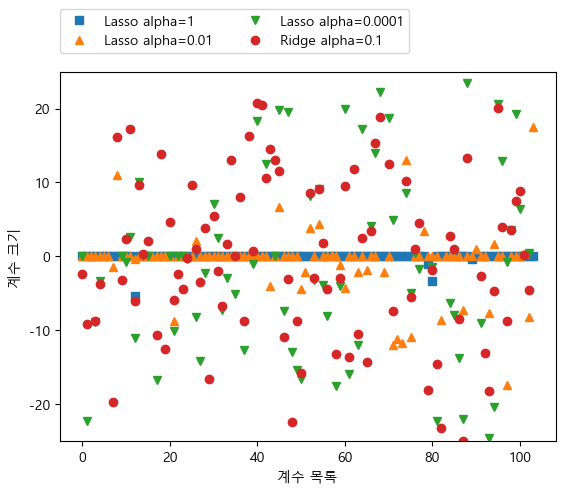

In [62]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1") # 특성 대부분 = 0
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001") # 0이 아닌 특성 증가

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음

#### QuantileRegressor
- 분위수 회귀 모델 : 예측의 백분위수(quantile)는 "조건부 목표값 분포의 특정 위치"를 예측
- 평균값이 아니라 **분포의 특정 지점(예: 중앙값, 하위 10%, 상위 90% 등)**을 예측
- QuantileRegressor(quantile=τ)에서 quantile=0.5는 50번째 백분위수, 즉 중앙값을 예측하는 모델을 의미

예: 집값 예측 문제

입력: 면적(㎡)

출력: 집값(백만원)

quantile=0.9는 다음을 의미:

"면적이 X_new인 집의 상위 10% 가격 경계선을 예측하라."

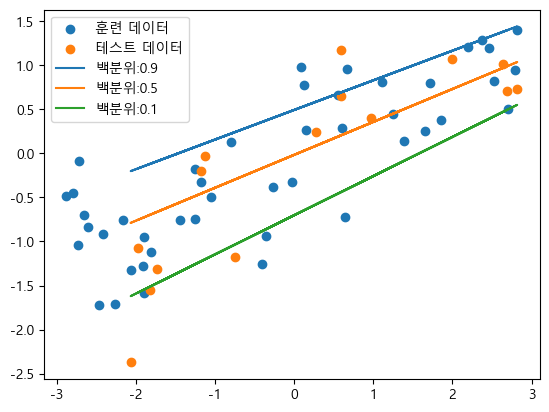

In [63]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label='훈련 데이터')
plt.scatter(X_test, y_test, label='테스트 데이터')
plt.plot(X_test, pred_up, label='백분위:0.9')
plt.plot(X_test, pred_med, label='백분위:0.5')
plt.plot(X_test, pred_low, label='백분위:0.1')
plt.legend()
plt.show()

#### 분류용 선형 모델

1. 선형 회귀 기반 분류 (값이 0보다 크냐 작냐로 분류) :page 87  y^ = wT.x + b > 0

  - 학습 과정은 **예측값과 실제값 사이의 평균제곱오차 (MSE)**를 최소화하는 방식 (회귀 손실 사용)

  - 분류 문제에 최적화되어 있지 않음, 즉, 오차를 최소화하는 방향으로 학습됨 → 분류 정확도는 고려하지 않음

2. SVC (Support Vector Classifier, 선형 SVM)

  - SVC는 선형 결정 경계(88페이지 두번째 문단)를 찾되, **클래스 간의 margin(여유 거리)**을 최대화하도록 학습하는 방식

  - 결정 경계에 가장 가까운 점들 (support vectors)과의 거리를 최대화

로지스틱회귀(Logistic Regression) 쉽게 이해하기, 논표범, 21.8.7., https://dine.tistory.com/75

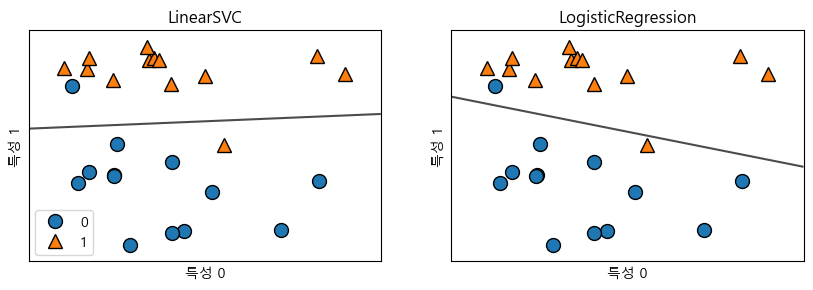

In [64]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.svm import LinearSVC # 서포트 벡터 머신

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() # 책에는 없음

그림 2-15: 두개를 잘 못 분류
- LinearSVC(), LogisticRegression() : L2 규제를 사용

C: inverse of regularization strength = 1/알파, 규제의 강도 = 알파 = 1/C

  > L2 = alpha *sigma(wi**2)

- C가 커지면 > 알파는 작아지고 > wi는 0보다 큰게 많아지고 > 모델이 복잡해짐 (90페이지 상단 문단 이해)

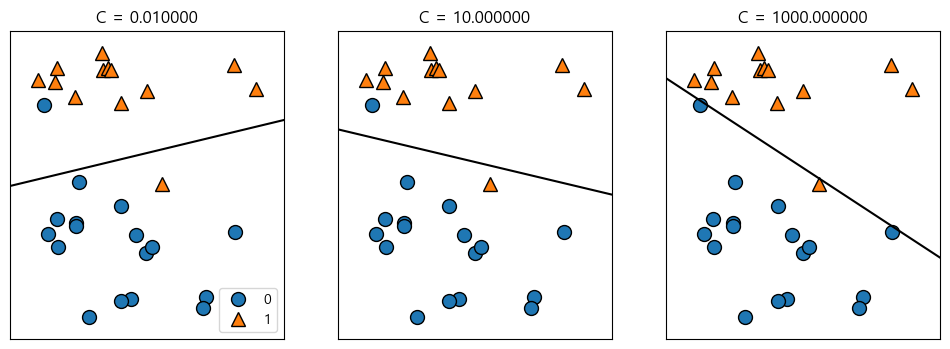

In [65]:
mglearn.plots.plot_linear_svc_regularization()

유방암 데이터세트에 대한 LogisticRegression()

In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # default 값 C = 1 > 과소 적합
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) # default 값 C = 1일 때 > 훈련세트점수 == 테스트세트 점수 > 과소 적합
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [67]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) # 큰 C > 과대 적합 - 복잡도 증가 
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train) # 작은 C > 과소적합
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


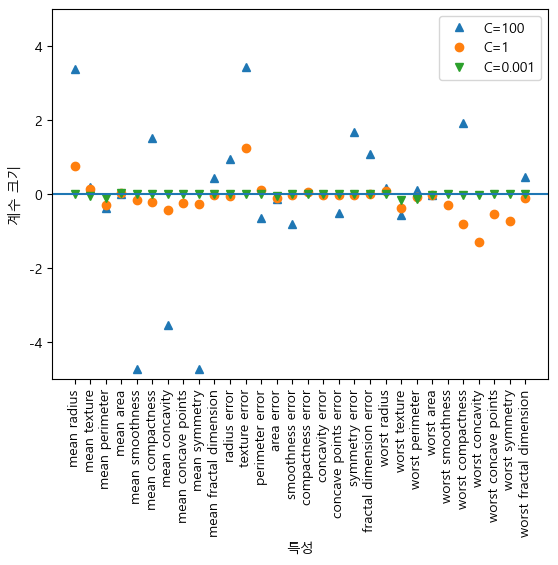

In [69]:
plt.plot(logreg100.coef_.T, '^', label="C=100") # 과대 적합 - 큰 C > 알파가 작다 > wi는 0보다 큰 값으로
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") # 과소 적합 - 작은 C > 알파가 크다 > wi를 0으로 > 사용되는 특성이 몇개 안된다 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성") # 변수
plt.ylabel("계수 크기") # 가중치 값
plt.legend()
plt.show() # 책에는 없음

L1 규제를 사용할 때의 분류 정확도와 계수 그래프: 94페이지 

사이킷런 0.22 버전부터는 `LogisticRegression`의 `solver` 매개변수 기본값이 `lbfgs`로 변경
- `lbfgs`는 L1 규제를 지원하지 않습니다. 따라서 `solver` 매개변수를 `liblinear`로 지정.(95페이지 하단 박스 설명)

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


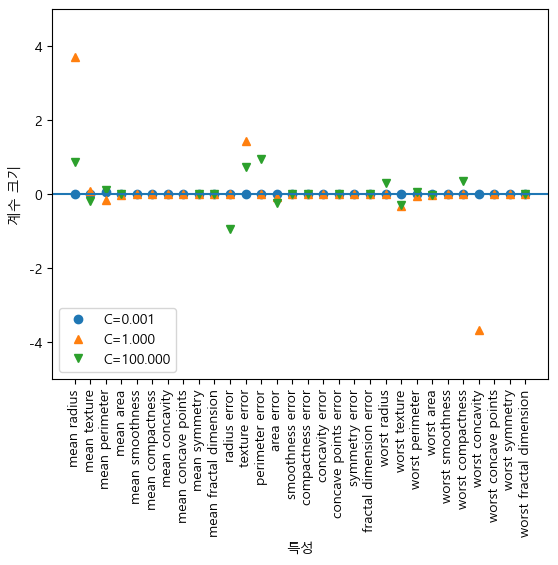

In [70]:
# 유방암 데이터세트에 대한 로지스틱 회귀의 C 값 적용

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train) # penalty="l1" > 일부 특성만 이용할지 결정 
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

#### 다중 클래스 분류용 선형 모델
- 이진 분류 알고리즘을 반복 적용하여 해결

1. One-vs-Rest (OvR, One-vs-All)
개념: 각 클래스마다 "이 클래스 vs 나머지"로 이진 분류기를 학습.

예: 클래스가 A, B, C 세 개라면

분류기 1: A vs (B, C)

분류기 2: B vs (A, C)

분류기 3: C vs (A, B)

예측 시: 각 분류기의 출력 점수(확률 또는 결정 함수 값)를 비교하여 가장 높은 값을 갖는 클래스를 선택.

사용 예시:

LogisticRegression(multi_class='ovr')

LinearSVC (기본적으로 OvR 방식 사용)

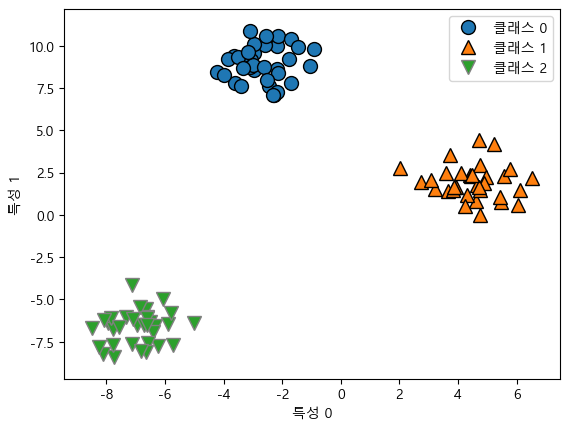

In [71]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show() # 책에는 없음

In [72]:
linear_svm = LinearSVC().fit(X, y) # y = w0 * x0 + w1 * x1 + b
print("계수 배열의 크기: ", linear_svm.coef_.shape) # (3,2) 특성 2개, 3개의 분류 
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


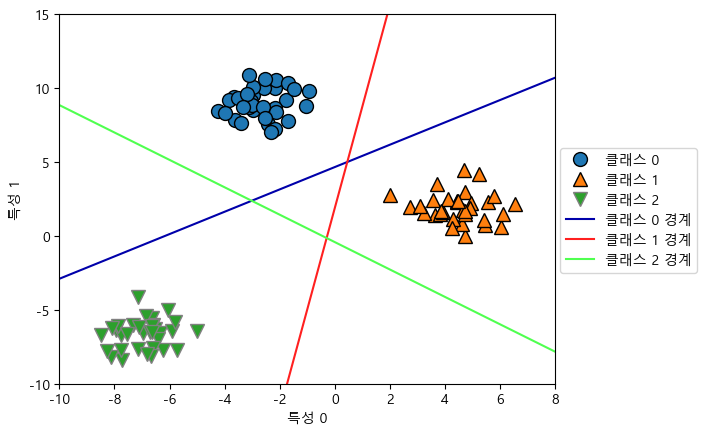

In [73]:
# 3개의 이진 분류기가 만든 경계를 시각화 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

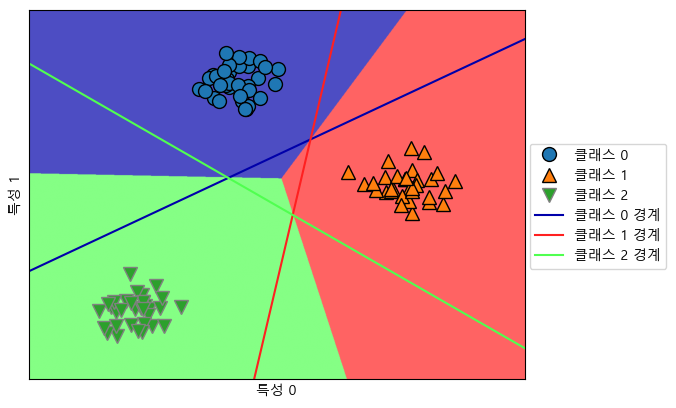

In [74]:
# 그림 중앙의 삼각형 영역의 분류는? 99페이지 > 가장 가까운 직선의 영역으로 나눈다 
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 장단점과 매개변수
- 선형 모델의 주요 매개 변수: 회귀 모델에서 매개 변수 조정이 매우 중요한 작업

  1) 회귀 모델: 알파 > 알파가 크면 단순 모델

  2) linearSVC, LogisticRegression: C > C 값이 작으면 단순 모델

- L1, L2 규제를 사용할지를 선택

  1) L1 규제: 중요한 특성이 많지 않을 때, wi가 0에 가까운 매우 적은 값 사용

  2) L2 규제: 중요한 특성만 사용, wi =0으로 제외

- 선형 모델은 학습 속도가 빠르고 예측도 빠르다 >대용량 데이터세트 사용시

  LogisticRegression, Ridge에 solver = 'sag'옵션 사용 > sag: Stochastic Average Gradient Descent(확률적 평균 경사 하강법)

In [75]:
# scikit-learn의 fit 메소드는 self를 반환 > 메소드 연결

# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [76]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [77]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

경사하강법

1) 구글링1: LineaLinear Regression(선형 회귀) 경사하강법과 최소자승법으로 풀기,SHIN JINHYO - March 27, 2020, https://realblack0.github.io/2020/03/27/linear-regression.html

2) 구글링2: 모델이 학습하는 방법 (1) - 손실함수(Loss function)와 경사하강법(Gradient Descent), 호사린가마데라닌 2021. 10. 6. 15:44, https://yhyun225.tistory.com/5

3) 구글링3: [4-2] 확률적 경사 하강법,jwjwvison 2021. 4. 7. 00:37,https://mldlcvmjw.tistory.com/112
  Stochastic Gradient Descent: stochastic: invoving a random variable

4) 구글링4: [신경망 이해] 경사하강법에서 손실 값의 변화, 6월 30, 2025, https://trvoid.blogspot.com/2021/06/blog-post.html

5) 구글링5: 배치와 미니 배치, 확률적 경사하강법 (Batch, Mini-Batch and SGD), 2020.05.28 14:57, 강의/딥러닝 기초, https://skyil.tistory.com/68

6) 구글링6: 딥러닝-6.3. 최적화(4)-확률적 경사 하강법(SGD), 만년필잉크 2021.2.5., https://gooopy.tistory.com/69

7) 구글링7: 확률적 경사 하강법 (Stochastic Gradient Descent), 2021. 8. 14. 16:33, · AI/머신 러닝(ML), https://aodtns.tistory.com/52


SGDClassifier와 SDGRegressor

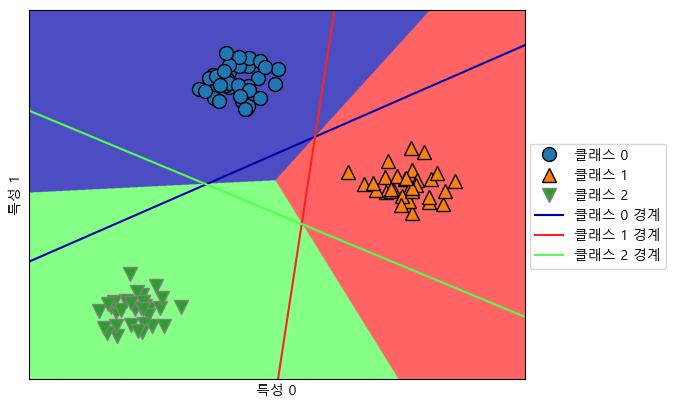

In [78]:
# 확률적 경사 하강법 사용 분류기 
# 다양한 선형 모델 중에서 선택하기가 데이터 분석가가 알아야 하는 내용

from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive',
                      eta0=0.1, random_state=42, n_jobs=-1) # 알파값 등의 매개변수 지정이 데이터 분석가가 알아야 하는 내용
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [79]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(sgd_r.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(sgd_r.score(X_test, y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.77


2.3.4 나이브 베이즈 분류기 (제외)

In [80]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [81]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


### 2.3.5 결정 트리

- 머신러닝 모델 중에서 가장 많이 사용되는 모델로 매우 중요 

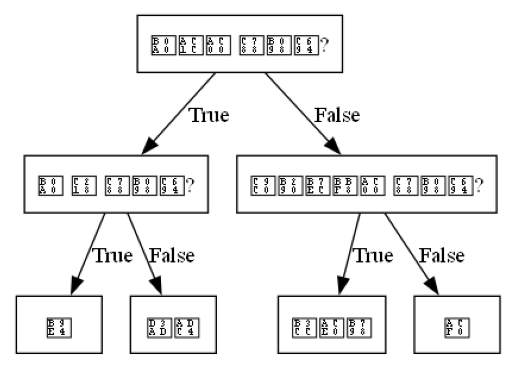

In [82]:
mglearn.plots.plot_animal_tree()
# 트리 노드: 질문이나 답 - 그림 2-22
# edge: 질문의 답과 다음 질문 연결 

#### 결정 트리 만들기

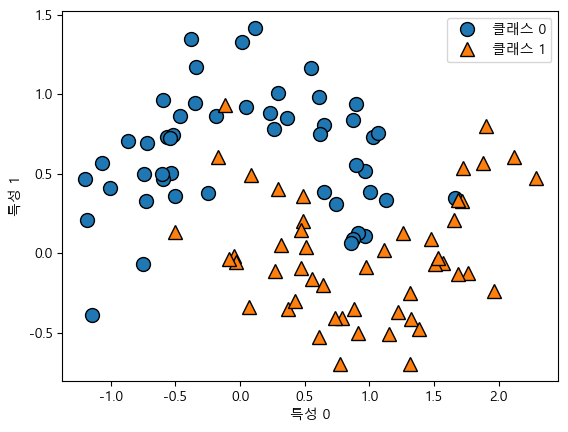

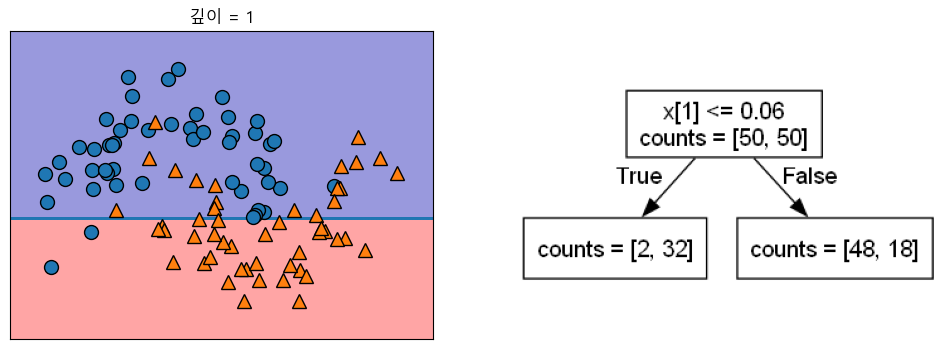

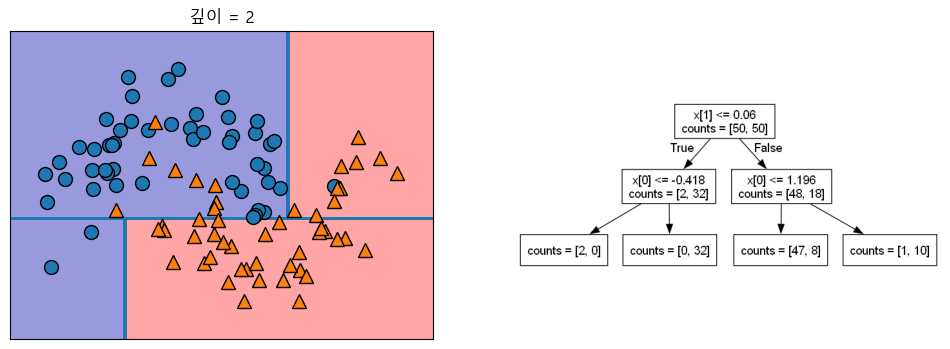

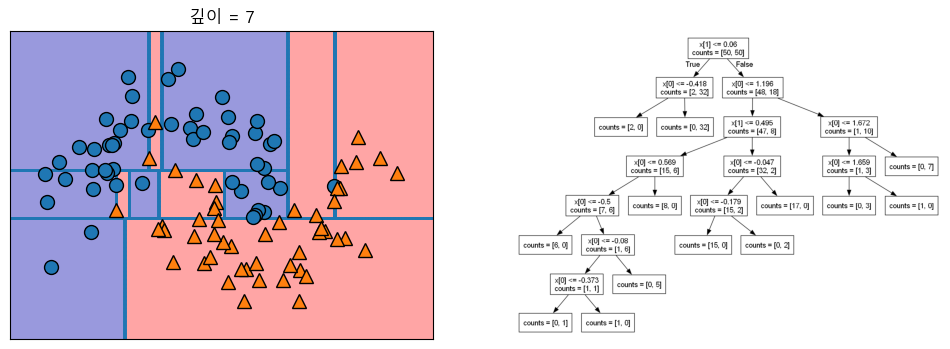

In [83]:
mglearn.plots.plot_tree_progressive()
# 2차원 데이터세트를 분류하는 결정트리
# 클래스 0인 50개, 클래스 1인 50개의 데이터 포인트를 특성1, x[1] <= 0.06에서 분할이 최대 균등 분할 , 루트 노드 counts=[50,50]
# 깊이 1이 노드 => 루트 노드
# 깊이 2인 노드 => child 노드, 특성0, x[0] < - 0.418
# 깊이 7인 노드 => 결정 트리의 리프노드는 한개의 target 값(하나의 클래스)을 가질 때까지 반복 > target 1개로만 이뤄진 리프 노드: pure node
### 109페이지 두번째 문단
# 분류 예측 결과: 새로운 데이터 포인트에 대한 예측 > 트리를 따라가 분할된 영역의 최종 리프의 다수(pure node인 경우는 하나)를 예측
# 회귀 예측 결과: 주어진 데이터 포인트에 대한 트리를 따라가 최종 리프 노드의 평균값을 예측 값으로 한다 
### 110페이지 첫번째 문단, 두번째 문단 

결정 트리의 복잡도 제어하기
- 리프노드가 순수 노드가 될때까지 진행: 모델이 복잡 > 훈련데이터에 과대 적합 > 그림 2-26

- 과대적합을 막는 방법

  1) 사전 가지치기(pre-pruning):  트리 생성을 일찍 중단 - scikit-learn은 사전 가지치기만 지원
  
  2) 사후 가지치기(post-pruning): 데이터 포인트가 적은 노드를 삭제하거나 병합

In [84]:
# 유방암 데이터세트를 사용한 사전 가지치기 효과 확인

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0) #default 값 설정으로 완전한 트리 모델(모든 leaf node가 pure node가 될때까지 생성)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) #모든 리프 노드가 순수 노드이므로 훈련세트의 정확도 100%
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [85]:
# 사전 가지치기 제한 옵션 사용

tree = DecisionTreeClassifier(max_depth=4, random_state=0) #연속된 질문을 4개 제한>트리 깊이를 제한 > 과대적합 해소
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train))) # 훈련세트에 대한 과대 적합 해소 
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석


In [86]:
!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [87]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True) # 트리를 시각화
# 각 노드의 색상: 다수인 클래스 색상으로, 레이블은 클래스 이름, 특성 이름을 전달

In [88]:
import graphviz
dot = graphviz.Digraph(comment='Test Graph')
dot.node('A', 'Start')
dot.node('B', 'End')
dot.edges(['AB'])
dot.render('output.gv', view=True)  # PDF or PNG로 출력


'output.gv.pdf'

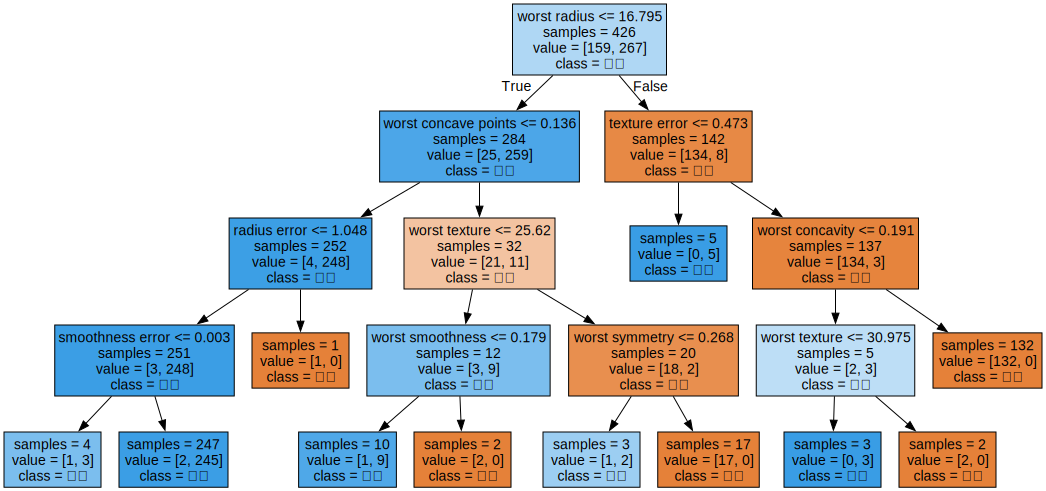

In [89]:
# 트리 시각화 > 결정 트리 알고리즘의 동작 흐름 이해가 용이

import graphviz

with open("tree.dot", encoding="utf-8") as f:  #encoding을 수정
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
# samples = 426 > 각노드의 샘플 수
# values =[159,267] > [음성 수, 양성 수]

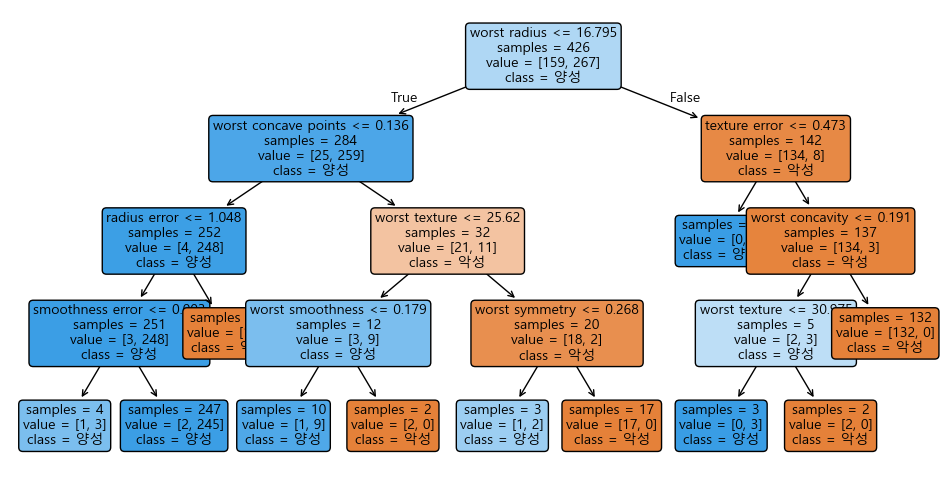

In [90]:
from sklearn.tree import plot_tree # .dot 파일을 만들지 않고 트리 가시화 
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["악성", "양성"],
          feature_names=cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

#### 트리의 특성 중요도

- 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가: 특성 중요도

In [91]:
print("특성 중요도:\n", tree.feature_importances_) # 0 ~ 1 사이의 값으로 전체 합이 1

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


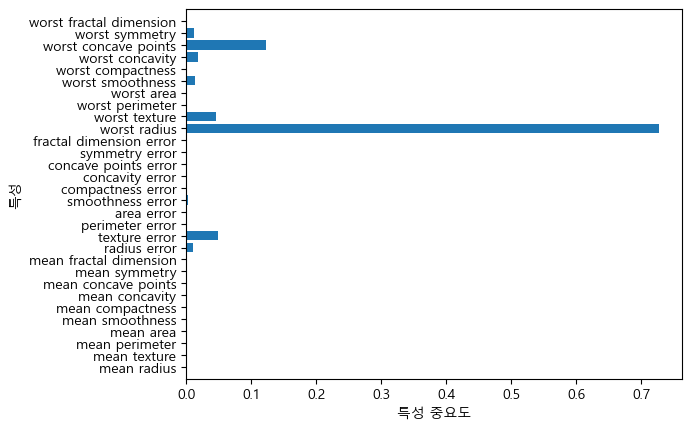

In [92]:
# 특성 중요도의 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도") # worst radius가 중요도 높지만 반지름이 크다고 해서 양성이라고 해석할 수는 없다, 118페이지 세번째 문단 
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


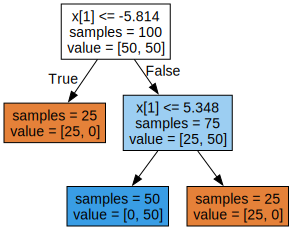

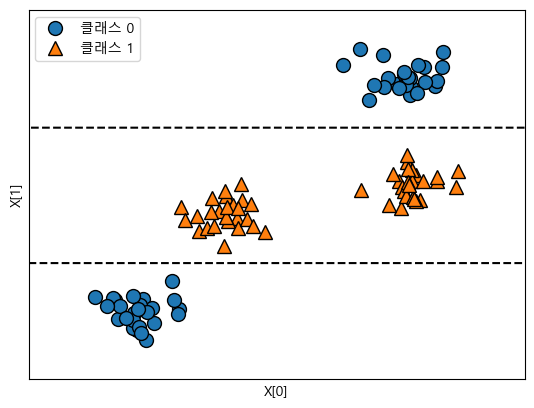

In [93]:
mglearn.plots.plot_tree_not_monotone()
#특성 중요도 [0 1]은 X[0]의 중요도는 0
#트리는 X[1] 특성으로 생성됨 >  X[1] 값이 크다고 해서 클래스 0이라고 해석할 수 없다, 117페이지 첫째 문단 

회귀 결정 트리

- DecisionTreeRegressor는 extrapolation( 훈련 데이터의 범위 밖의 포인트에 대한 예측)을 지원하지 못한다 

- Interpolation : 학습 데이터 범위 내의 입력값에 대해 예측 > 트리는 잘 작동함 — 리프 노드에서 평균값 반환

학습 데이터

입력 특성 x 값: [1, 2, 3, 4, 5]

출력 y: [1.1, 1.9, 3.0, 4.2, 5.1]



Interpolation (예: x = 3.5) > 3.5는 학습 데이터 범위 1~5에 포함됨

결정 트리는 x = 3.5가 속한 리프 노드를 찾아서 그 노드의 평균 y값을 반환

 -> 정상적으로 예측 가능

extrapolation (예: x = 10) > 10은 학습 데이터 범위를 벗어난 입력

결정 트리는 이 값을 위한 분할 기준이 없고, 가장 가까운 리프 노드의 값을 그냥 반환

-> 트리는 외삽을 전혀 수행하지 못함

-> 예: 10이 5보다 크므로 x > 5인 노드가 없으면 그냥 x=5의 예측값을 반환할 수 있음

->> 예측이 부정확하거나 의미 없음

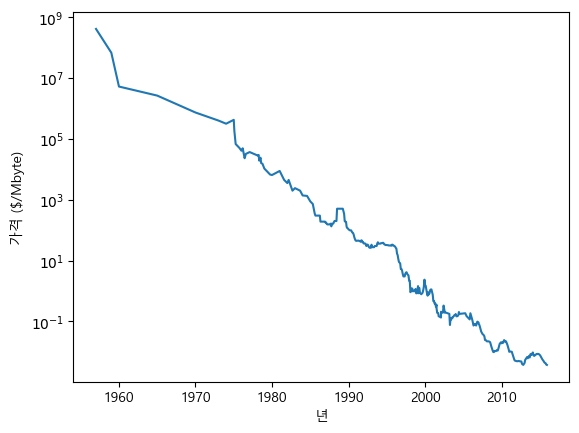

In [94]:
import os
# 메모리 가격 동향 데이터세트
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() # 책에는 없음

In [95]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

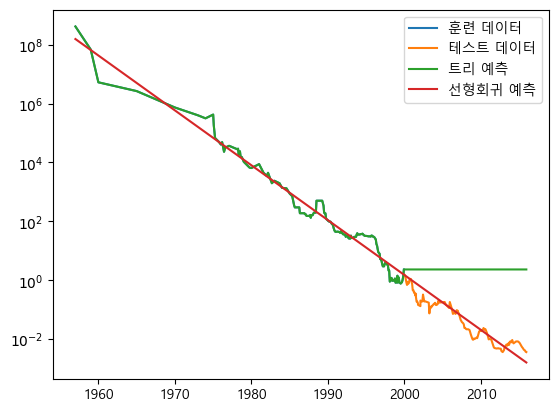

In [96]:
plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측") # 훈련데이터는 완벽, 그러나 2000년 이후 테스트 데이터는 예측 못함
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측") # 직선으로 예측
plt.legend()
plt.show() # 책에는 없음

#### 장단점과 매개변수
- 트리 모델의 단점: 훈련 데이터 밖의 새로운 데이터를 예측할 수 없다

- 결정트리의 주요 단점: 사전 가지치기를 하여도 과대적합 경향 > 성능이 떨어진다 

### 2.3.6 결정 트리의 앙상블
- ensemble: a group producing a single effect: 

- 여러 개의 결정트리(Decision Tree)를 조합하여 하나의 강력한 모델을 만드는 방법을 의미

- 앙상블 종류

  1) 랜덤 포레스트(Random Forest):  앙상블 기법: 배깅(Bagging: Bootstrap Aggregating)

     > Bootstrap: Boot 장화, strap 끈 > bootstrapping: 자기 스스로 하는, 자력으로 성공하다 

     > bootstrap: [단어뜻] 자기 스스로 하는 > "소스 데이터세트를 가지고 스스로 다른 데이터세트를 만들어내는" 방식의 명칭으로 사용

     > 통계분야의 bootstrap 뜻: 복원 추출(resampling with replacement) >  샘플링할 때 중복을 허용하면서 여러개의 데이터세트를 만들어내는 것 

       ** with replacement: 뽑고 다시 넣는다 (대신하다 뜻)
       
    
  2) 그레이디언트 부스팅(Gradient Boosting): 앙상블 기법: 부스팅(Boosting: 신장시키다, 격려 뜻): to push or shove up from below

    > 이전 모델이 틀린 예제를 더 잘 맞추도록 다음 모델이 학습

    > 이전 모델의 오류(잔차, 오차)**를 경사하강법(gradient descent) 방식으로 줄여가는 결정트리 앙상블
    
    > 부스팅(Boosting)이란? 앞선 모델의 오차를 보완하면서 점점 예측 성능을 높이는 방식


#### 랜덤 포레스트
- 결정 트리의 주요 단점: 훈련 데이터에 과대 적합되는 경향

- 각각의 결정트리를 다른 bootstrap 샘플(bagging)로 훈련시켜 다양한 모델 생성 > 생성 트리의 무작위성 반영
  방법1) 트리를 만들때 사용되는 데이터 포인트를 무작위로 선택
  방법2) 분할 테스트에서 특성을 무작위로 선택

##### 랜덤 포레스트 구축
- 생성할 트리의 갯수: n_estimators 매개변수

단계1) 각 트리가 고유하게 만들어지게 한다 < bootstrap sample: n_samples개의 데이터포인트에 대하여 무작위로 데이터를 n_samples횟수 만큼 반복 추출


단계2) 각 노드에서 특성을 무작위로 선택: max_features 매개변수가 몇개의 특성을 선택할지를 조정

*** 123페이지 문단2의 이해가 필요: 랜덤 포레스트의 각 트리는 1) 다른 데이터세트 사용, 2) 다른 특성을 선택하여 분기


##### 랜덤 포레스트 분석
- 각 트리의 결정 경계와 랜덤 포레스트의 결정 경계의 차이를 확인:125페이지 상단 문단1, 문단2

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # 5개의 결정 트리
forest.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


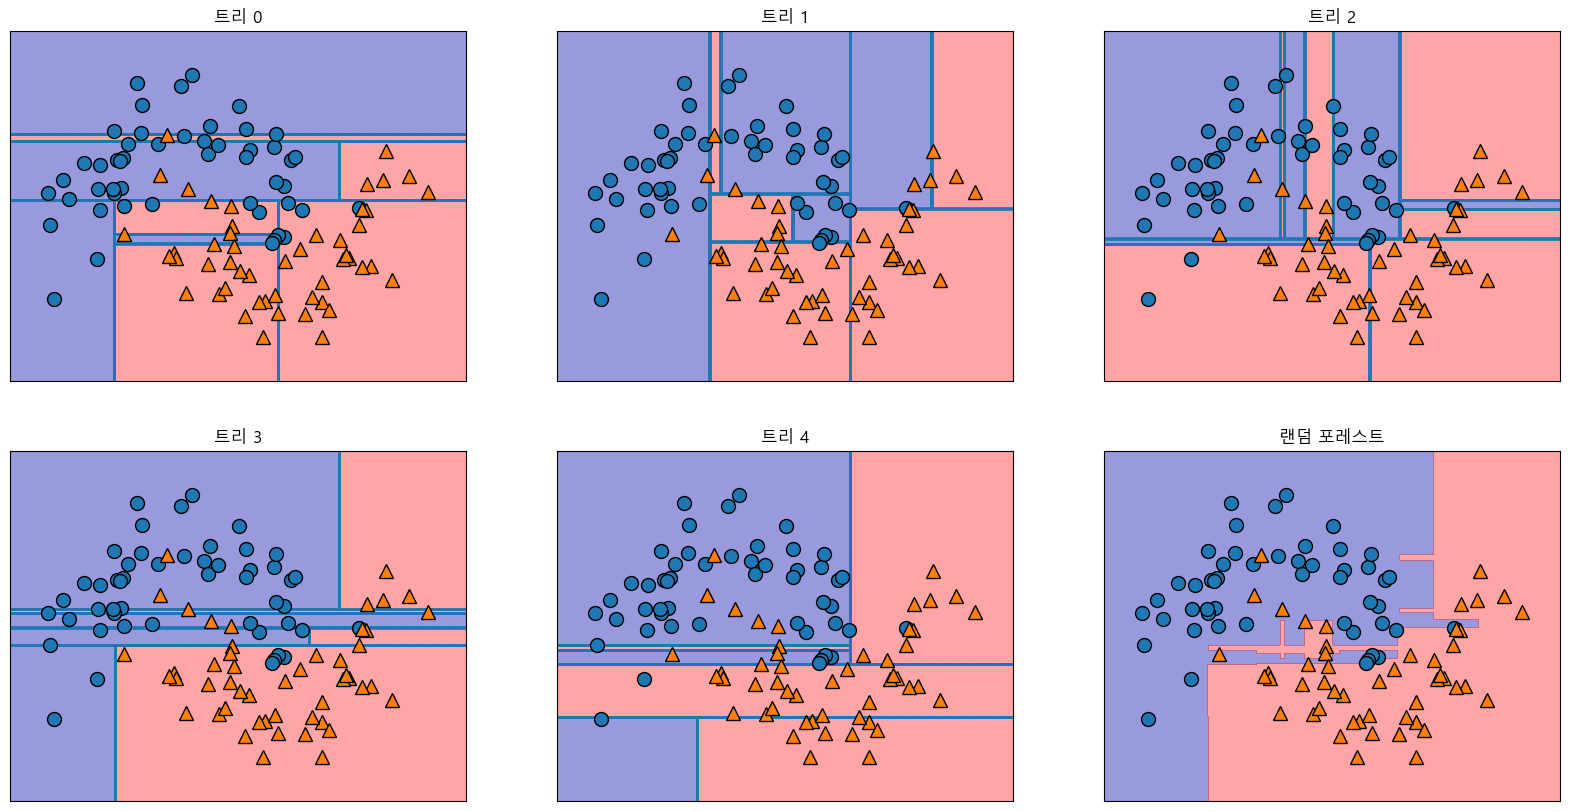

In [98]:
# 각 결정 트리의 결정 경계, 랜덤 포레스트의 결정 경계를 비교하여 관찰하기

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)): # forest.estimators_	는 랜덤 포레스트를 구성하는 결정트리 모델들의 리스트
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show() # 책에는 없음

In [99]:
# 유방암 데이터세트에 대하여 적용된 랜덤 포레스트

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) # 결정트리가 100개
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test))) # 테스트 데이터에 대한 정확도 97%

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


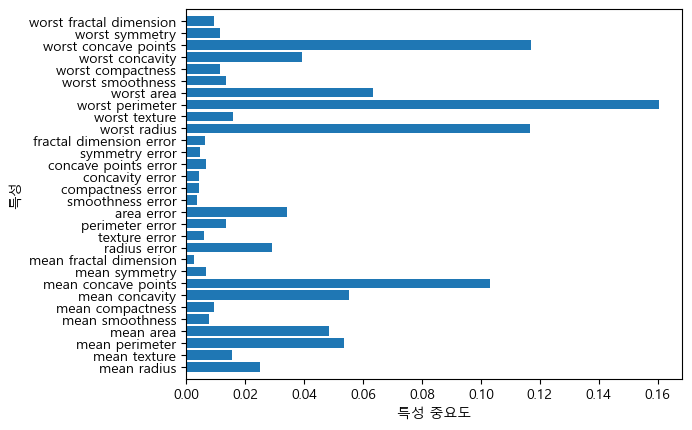

In [100]:
# 랜덤 포레스트가 제공하는 특성 중요도
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수
- 장점: 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘

- 단점: 텍스트 데이터처럼 고차원 데이터(특성이 많은 것), 데이터 사이즈가 작을 때는 잘 작동안됨 > 선형 모델로 해결

- 중요 매개변수:
 1) n_estimators 클수록 좋다
 2) max_features: 각 트리가 얼마나 무작위로 될지를 결정
    max_features = sqrt(n_features) > 과대 적합을 줄여준다

#### 그래디언트 부스팅 회귀 트리

gradient boosting: 이전 모델의 오차를 보정하는 새로운 모델을 반복적으로 구성

- 손실함수 최소화하기 위한 경사하강법 사용

- 계산된 그래디언트를 손실함수가 최소화하는 방향으로 모델을 학습 > 잔차가 가장 줄어드는 분기점을 택해 분기한다

  > Cost() = 1/n Sigma(y - y^)**2

  > dCost()/dy^ = y^ - y => 기울기이고 잔차

  > 잔차가 0이 목표 > 기울기가 0인 것 의미
  

- 그래디언트를 사용하여 트리의 분할 기준을 결정

- 손실함수를 최소화하는 방향으로 트리를 학습

- XGBoost등으로 구현

그라디언트 부스팅 (Gradient Boosting), 박경아, 23.5.22, https://brunch.co.kr/@parkkyunga/96
- boosting : 신장시키다 부양책 > 약한 모델을 여러번 순차적으로 적용해 강한 모델을 만들어 나가는 것


** 배깅과 부스팅 차이
- 배깅(Bagging, Bootstrap Aggregating): bootstrap: 데이터셋에서 여러 중복 샘플 집합을 생성 → 각각 독립적인 모델 훈련 → 결과 평균 또는 투표(aggregating) > Random forest
 > bagging은 bootstrap + aggregating 합성어

- 부스팅: 이전 모델의 오류를 보완하는 방식으로 순차 학습,오류에 집중하여 점점 더 잘 맞추도록 개선, 첫 모델이 틀린 샘플에 가중치를 부여 → 다음 모델이 그 샘플에 더 집중 → 최종 예측은 가중 합산 > XGBoost(Extreme Gradient), LightGBM

boost 단어 뜻: 밀어올리다, 증가시키다, 강화하다
- Boost (in computing / machine learning)
→ 어떤 시스템이나 성능을 향상시키거나 개선하는 기법
→ 예: 그래디언트 부스팅은 성능을 점진적으로 향상시키는 모델

머신러닝에서의 "Boosting"은:

- 여러 개의 **약한 학습기(weak learners)**를 결합하여 **강한 학습기(strong learner)**를 만들어 성능을 점점 밀어올리는 알고리즘

- "Boost"는 단어 그대로 모델의 정확도나 예측력을 계속 밀어올리는 과정

Bagging 특징:
- 여러 개의 모델(예: 결정 트리)을 학습시킴

- 각 모델은 원본 데이터에서 부트스트랩 샘플로 학습

- 예측 결과를 평균 또는 다수결로 통합

- 모델 간 편향(bias)은 그대로지만 분산(variance)은 감소됨

- 과적합(overfitting)을 줄이는 효과가 있음

Random Forest는 Bagging + 랜덤한 특성 선택을 결합한 방식
- Random Forest 특징:
1) 기본적으로 여러 개의 결정 트리를 사용하는 Bagging 구조

2) 각 트리를 만들 때:

  -- 데이터 샘플을 부트스트랩 방식으로 뽑음

  -- **특성(feature)**도 무작위로 일부만 선택하여 분할 기준을 찾음

- 각 트리는 서로 독립적이고, 결과는 다수결(분류) 또는 평균(회귀)

In [101]:
# 유방암 데이터세트를 사용한 GradientBoosting회귀트리

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train))) # 훈련세트 정확도 100% > 과대적합
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


그래디언트 부스팅은?
- 예측 모델을 점진적으로 향상시키기 위해 약한 모델(예: 결정 트리)을 순차적으로 추가하는 방식

- 각 단계에서 이전 모델이 만든 **오차(잔차, residual)**를 줄이기 위해 새로운 모델을 학습
 > 잔차에 대한 손실 함수의 그래디언트 방향으로 새로운 모델을 만들어 보정.

 > 즉, 각 모델은 손실 함수의 음의 그래디언트 방향을 따라 오차를 줄이도록 학습.

그래디언트 부스팅
- 처음엔 기본 모델로 예측 (예: 모든 값의 평균)

- 예측이 틀린 방향을 보고 "얼마나 틀렸는지" = 잔차를 계산

- 그 잔차를 **가장 잘 설명할 수 있는 작은 결정 트리(약한 모델)**를 학습

- 그 트리의 예측을 기존 모델에 더해서 보정

- 이렇게 계속 반복하여 오차를 줄여감 → 경사 하강법과 같은 방식

In [102]:
# 과대적합 해결 > 트리의 최대 깊이를 1로 제한

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) # 테스트 데이터 성능 개선

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [103]:
# learning_rate: 이전 트리의 잔차를 얼마나 강하게 보정할 것인가를 제어
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) # 학습율 제어가 테스트 데이터 성능 개선이 기여못함

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.958


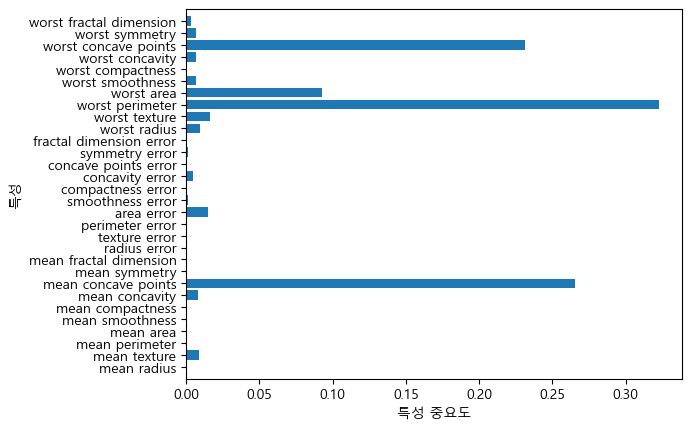

In [104]:
# 특성의 중요도 시각화 

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 장단점과 매개변수
- 일반적인 성능이 우수한 모델: 랜덤 포레스트

- 대규모 머신 러닝 문제 해결 또는 정확도 성능 개선: xgboost(gradient boosting 방법)

  > 지도 학습에서 가장 강력하고 널리 사용되는 모델 중 하나(131페이지 장단점과 매개변수 절의 첫번째 문단)

  > xgboost 단점: 매개변수 설정을 잘해야 한다. 훈련시간이 길다 

- GradientBoosting 트리 모델의 중요 매개변수:

  > n_estimators: 트리 갯수를 지정

  > learning_rate: 이전 트리의 오차를 보정하는 정도를 조절
 
  > max_depth: 트리의 복잡도를 조절

### 2.3.8 커널 서포트 벡터 머신

- SVM(Support Vector Machine)

  > [파이썬/머신러닝] SVM(Support Vector Machine) 분류 - 이론, 바람돌이, 2019. 9. 29. 1:18, https://m.blog.naver.com/winddori2002/221662413641


- 선형 서포트 벡터 머신: 88페이지 분류용 선형 모델 


#### 선형 모델과 비선형 특성
- 그림 2-36: 선형 모델로 분류 안됨

- 선형 모델을 유연하게 만드는 방법 필요 > 특성 변환 필요

  > 비선형 분리에 사용 


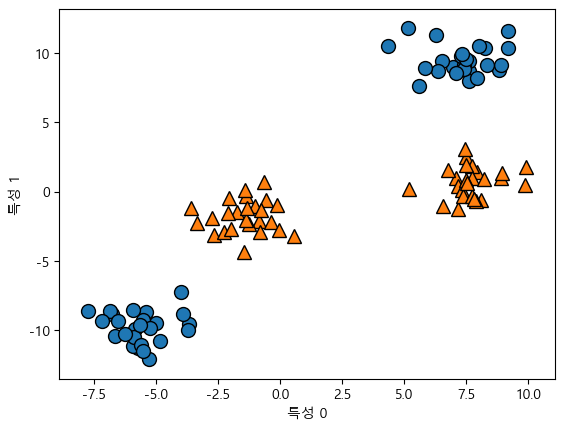

In [105]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

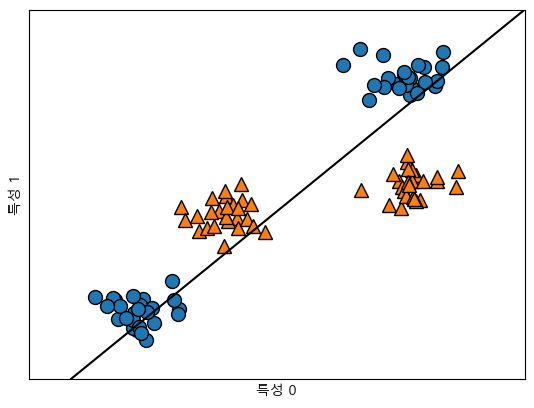

In [106]:
from sklearn.svm import LinearSVC # 분류를 위한 선형 모델
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [107]:
X[:5]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772],
       [-1.36579859, -0.3148625 ],
       [-2.66521206, -3.12591651]])

커널 서포트 벡터 머신

- SVM의 결정 경계는 선형 분류기인데, 데이터가 비선형적으로 분리될 경우 그대로는 잘 안된다 

- 커널: 2차원에서 선으로 못 나누던 데이터를 3차원 이상 공간으로 보내면 평면(선형)으로 구분 가능

C:\Users\user\AppData\Local\Temp\ipykernel_21240\2852984545.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


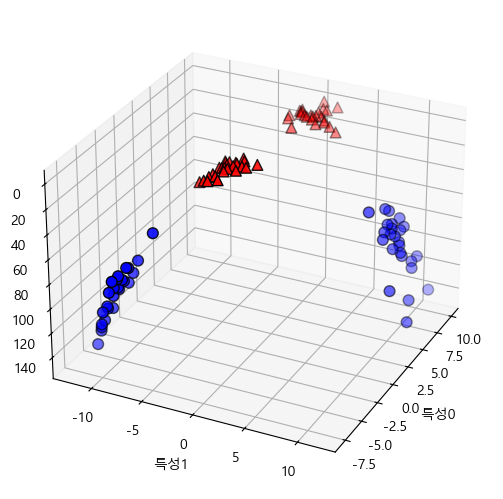

In [108]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2]) # x1, x2, x2**2

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프: 문자열 비교문 나중에 숫자로 비교는걸로 바꾸기!!
#if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
#    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
#    figure.add_axes(ax)
#else:
#    ax = Axes3D(figure, elev=-152, azim=-26)
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")

ax.set_zlabel("특성1**2", fontsize=8, labelpad=10)
plt.tight_layout()

plt.show() # 책에는 없음

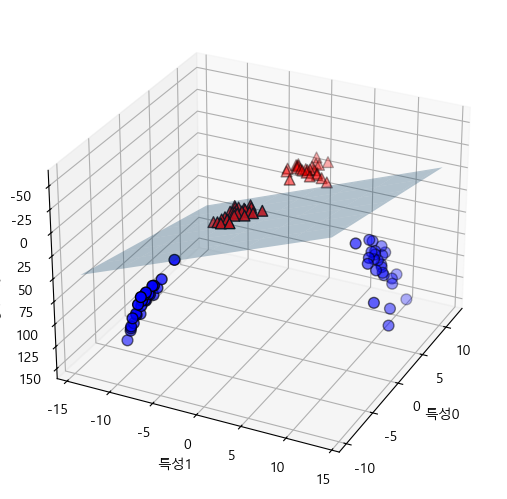

In [109]:
# 3차원 공간에서 선형 모델

linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
#if matplotlib.__version__ >= '3.4': # : 문자열 비교문 나중에 숫자로 비교는걸로 바꾸기!!
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
#    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
#    figure.add_axes(ax)
#else:
#    ax = Axes3D(figure, elev=-152, azim=-26)
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) # 선형 결정 경계 그리기
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

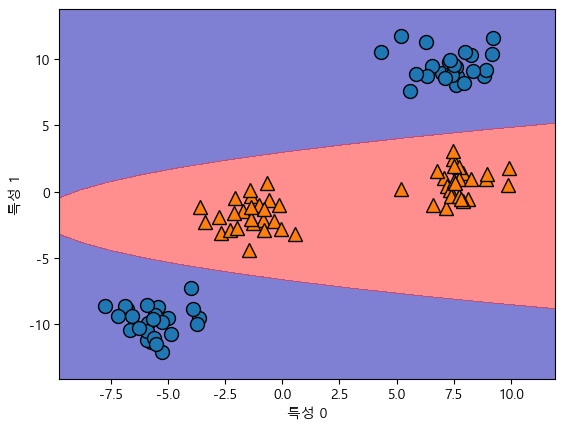

In [110]:
# 2차원에 투영 - 실행 결과만 보고 이해하는 수준으로 
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) # 결정 경계 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 커널 기법
#### SVM 이해하기

- 매핑함수 II(x) : 데이터 x를 2차원(x1, x2)에서 더 높은 차원 특성 공간으로 변환(x1**2, root 2 *x1 * x2, x2**2,)

  > x = (1,2), z = (3,4)

  > II(x) = (1*1, root 2 * 1 *2, 2*2), II(z) = (3*3, root2 * 3 *4, 4*4)

- 커널 함수 K(x,z)

  > 3차원 공간에서 II(x).II(z) = 1*9 + root 2 *2 * root 2 * 12 + 4*16 = 121

  > K(x,z) = (x.z)**2 # x.z는 내적

- 커널 트릭

  > 매핑 함수를 계산하지 않고서도 커널 함수를 사용하여 고차원 특성 공간에서 계산한 것과 같은 효과

구글링: 커널 방법 이론(Kernel method, kernel trick), 2024.1.16, python/머신러닝, https://yololifestudy.tistory.com/entry/%EC%BB%A4%EB%84%90-%EB%B0%A9%EB%B2%95-%EC%9D%B4%EB%A1%A0kernel-method-kernel-trick

구글링: Support Vector Machine, SVM, by Nowkeeh Ahc, https://chaheekwon.tistory.com/entry/Support-Vector-Machine-SVM-1

매핑함수와 커널 함수의 관계

- 커널 함수 K(x,z) = II(x).II(z) : 벡터 내적 > 내적은 유사도를 의미

  > II(x) = (x1**2, root of 2 *x1*x2, x2**2) : 2차 다항 특성을 만드는 3차원 벡터

- 커널트릭: K(x,z) = (x.z)**2 > II(x)를 계산하지 않고 벡터 내적을 계산하는 것을 말함

  > K(x,z) = 벡터들 x,z의 내적(유사도) 여기서 커널 트릭은 II를 명시적으로 계산하지 않고 K를 내적값으로 계산

#### SVM 이해하기
- 커널 함수

  > 다항식 커널: 특성1**2 + 특성**5 : K(x,y) = (x.y + 1)**p

  > RBF(Radial Basis Function): K(x,y) = e**(-gamma||x-y||**2)/(2*sigma**2) 가우시안 커널
    
    ** 두점이 얼마나 가까운가를 [0,1] 사이의 실수로 표현하는 유사도 지표

    ** gamma는 가우시안 커널의 폭을 제어하는 매개변수 > 감마 크면 거리 민감도가 크다, 감마 작으면 멀리 떨어져도 유사도 유지 > 매우 중요 
    

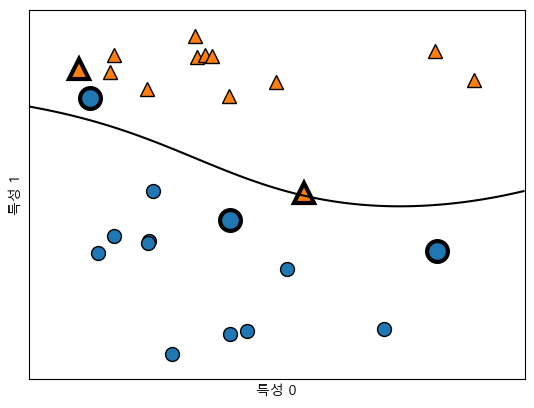

In [111]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
# 감마는 RBF 매개변수, C는 선형 모델의 규제 매개변수 : C = 1/알파
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) # 커널 RBF를 이해해야 한다 
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### SVM 매개변수 튜닝

SVM사용자로서 꼭 알아야 할 것들, ML.chang 2019. 7. 29. 12:20, https://championprogram.tistory.com/282

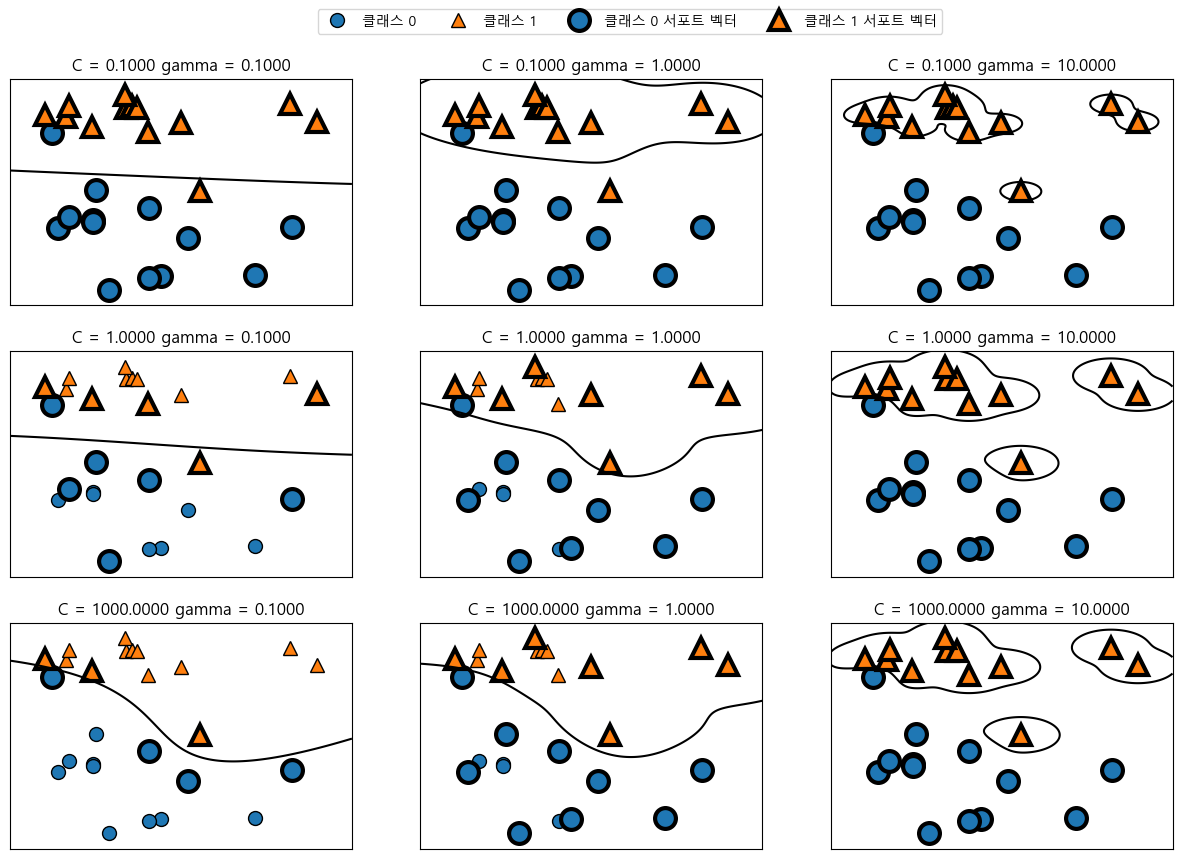

In [112]:
#152페이지 그림 2-42 하단 문단 이해할 수 있어야 한다 

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))
plt.show() # 책에는 없음

In [113]:
# RBF 커널 SVM을 유방암 데이터세트에 적용
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC() #default 값으로 C = 1, 감마 = 1/n_features
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train))) # 훈련 0.9
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test))) # 테스트 0.94 
# 과소적합 평가: 153페이지 하단 문단 > 훈련과 테스트 모두 낮으면 과소 적합이나 90% 이상이라 과소 적합 판단 어렵다 

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


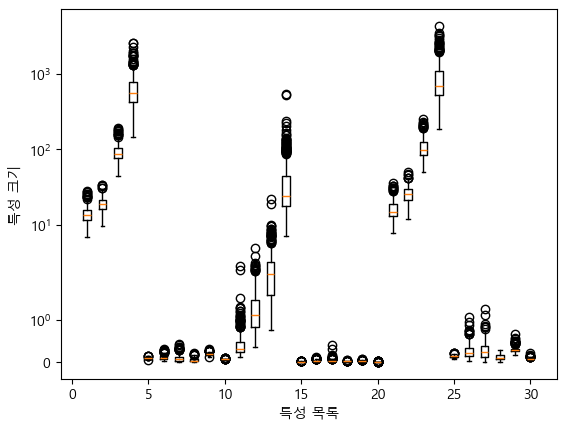

In [114]:
# 유방암 데이터세트 특성 값의 크기 범위 > 커널 SVM 에 미치는 영향 크다 > 특성 값 범위가 비슷하게 전처리 필요 

plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

#### SVM 을 위한 데이터 전처리

- 특성 값 범위가 비슷하게 조정

In [115]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0) # 특성별 최소값 계산 
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [116]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [117]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [118]:
svc = SVC(C=20) # C가 커지면 알파가 작아지니 wi가 0이 아닌 것이 증가 - 복잡도 증가
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


#### 커널 서포트 벡터 머신의 장단점과 매개변수

- 장점:

  > 강력한 모델, 다양한 데이터세트(저차원, 고차원)에서 잘 작동, 샘플이 많을 때는 잘 맞지 않음

  > 모든 특성이 비슷한 단위이고 스케일이 비슷할 때 사용


- 단점:

  > 데이터 전처리/매개변수 설정 잘해야 한다

  > SVM 모델의 결정 과정을 이해하기가 어렵다 > 랜덤 포레스트, gradient boosting 많이 사용

  > 규제 매개변수: C와 감마 설정을 잘해야 한다 



### 2.3.9 신경망 (딥러닝)
#### 신경망 모델

## graphviz 에러 발생시 조치 방법

아래 링크에서 Graphviz 설치 프로그램 다운로드: -graphviz-12.2.0(64-bit) EXE installer 다운로드 설치

🔗 https://graphviz.org/download/#windows

- install Options:
  > Add Graphviz to the system PATH for all users를 선택

Windows 검색에서 "환경 변수 편집" → "시스템 환경 변수 편집" 열기

시스템 변수에서 Path 선택 → "편집"
C:\Program Files\Graphviz\bin

VSCode, Jupyter, Anaconda Prompt 등 모두 완전히 종료 후 재실행

cmd창: dot -V


- 선형 회귀 모델

  y = w0*x0 + w1*x1 + ... + wp * xp + b

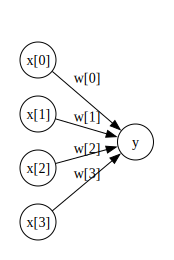

In [119]:
mglearn.plots.plot_logistic_regression_graph() # 로지스틱 회귀

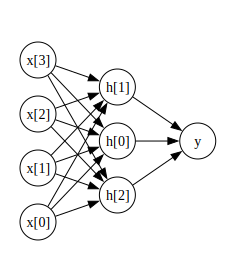

In [120]:
# scikit-learn MLP(Multi-Layer Perceptron)
mglearn.plots.plot_single_hidden_layer_graph() # 가중치 합이 만들어지는 과정이 반복

#### 입력 특성에 대한 가중치, 은닉층 특성에 대한 가중치를 학습해야 한다 158페이지 그림 2-45 밑 문단

Perceptron(퍼셉트론)과 MLP(Multi-Layer Perceptron), 휴석사 2020. 11. 10. 20:22, https://sanghyu.tistory.com/100

[34편] 딥러닝의 기초 - 다층 퍼셉트론(Multi-Layer Perceptron;MLP), 옥수별, 17.6.18, https://m.blog.naver.com/samsjang/221030487369

#### # 활성화 함수 - 가중치 합을 계산한 후에 비선형 함수 적용: 

- ReLU: Rectified Linear Unit

- tanh: Hyperbolic tangent

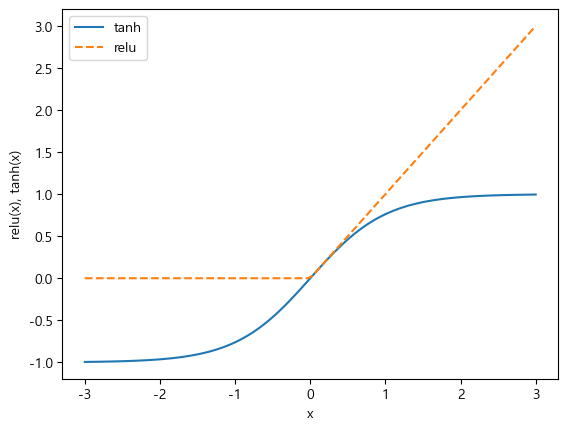

In [121]:

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show() # 책에는 없음

3. 활성화 함수: 종류와 선택 기준 - 스터디노트, 위키독스, 24.6.14, https://wikidocs.net/250622

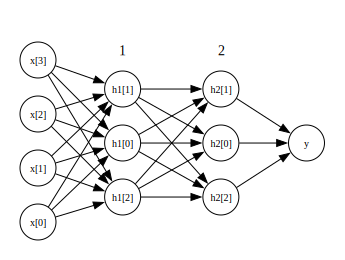

In [122]:
mglearn.plots.plot_two_hidden_layer_graph()

#### AI 겨울 코딩 실습 

#### 신경망 튜닝

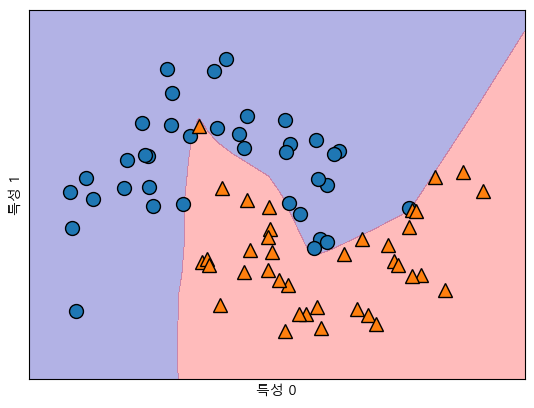

In [123]:
# 은닉계층의 units 수 = 100개
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  random_state=42)

mlp = MLPClassifier(solver='lbfgs',  random_state=0, max_iter=1000).fit(X_train, y_train) # hidden layer의 units: 100개 > 부드러운 결정 경계
# lbfgs는 sgd, adam과 유사한 방법으로 손실함수를 최소화하기 위해 w,b를 조정하는 방법-2차 미분을 사용
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

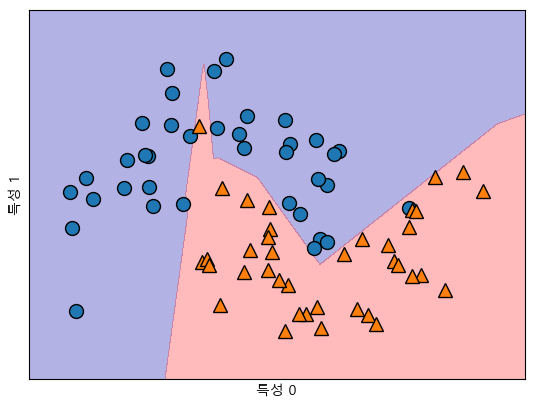

In [124]:
# 은닉층의 units 수 = 10개 > 날카로운 경계

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], #hidden layer의 unit 숫자
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

In [125]:
print(X_train.shape)

(75, 2)


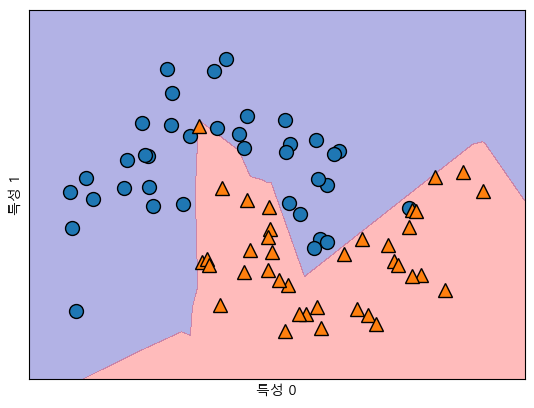

In [126]:
# 10개의 유닛으로 된 두 개의 은닉층 > 부드러운 결정 경계

mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000) # 은닉층을 추가 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

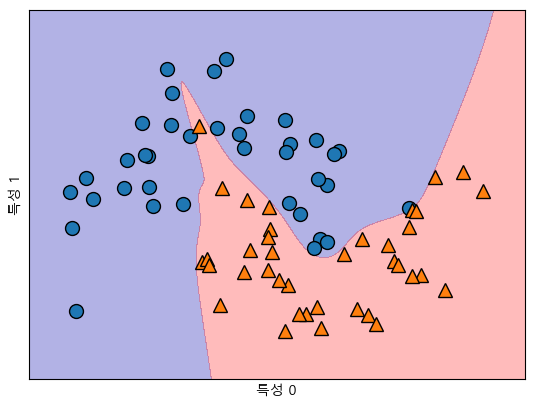

In [127]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', #  활성화 함수 변경 > 날카로운 결정 경계
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)#hidden_layer_sizes=[10, 100] unit 수 증가시켜 테스트
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

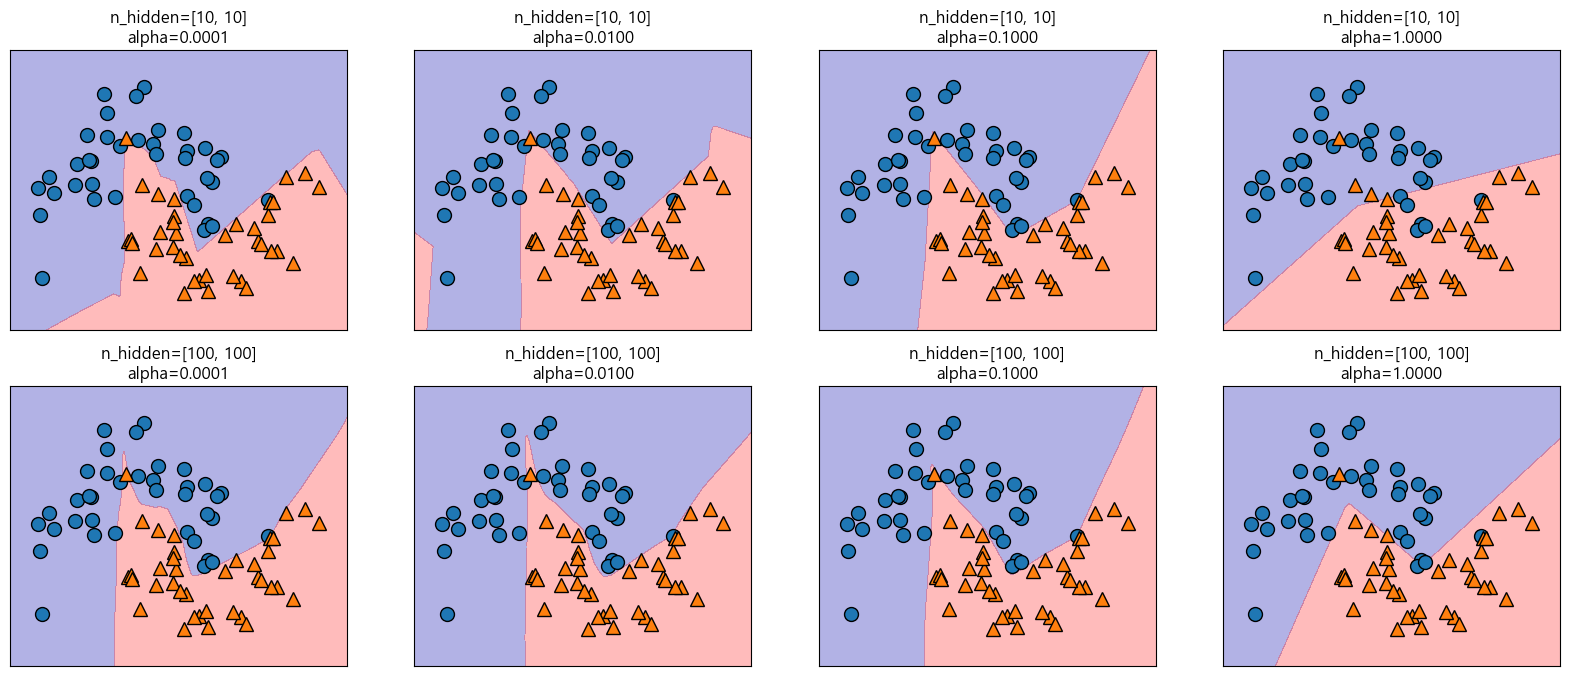

In [128]:
# MLPClassifier에서 알파값 > L2규제항
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]): # 은닉층의 unit 수 변화> 많으면 학습 모델이 복잡
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000) # 알파값 > L2 규제항 적용 - penalty
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

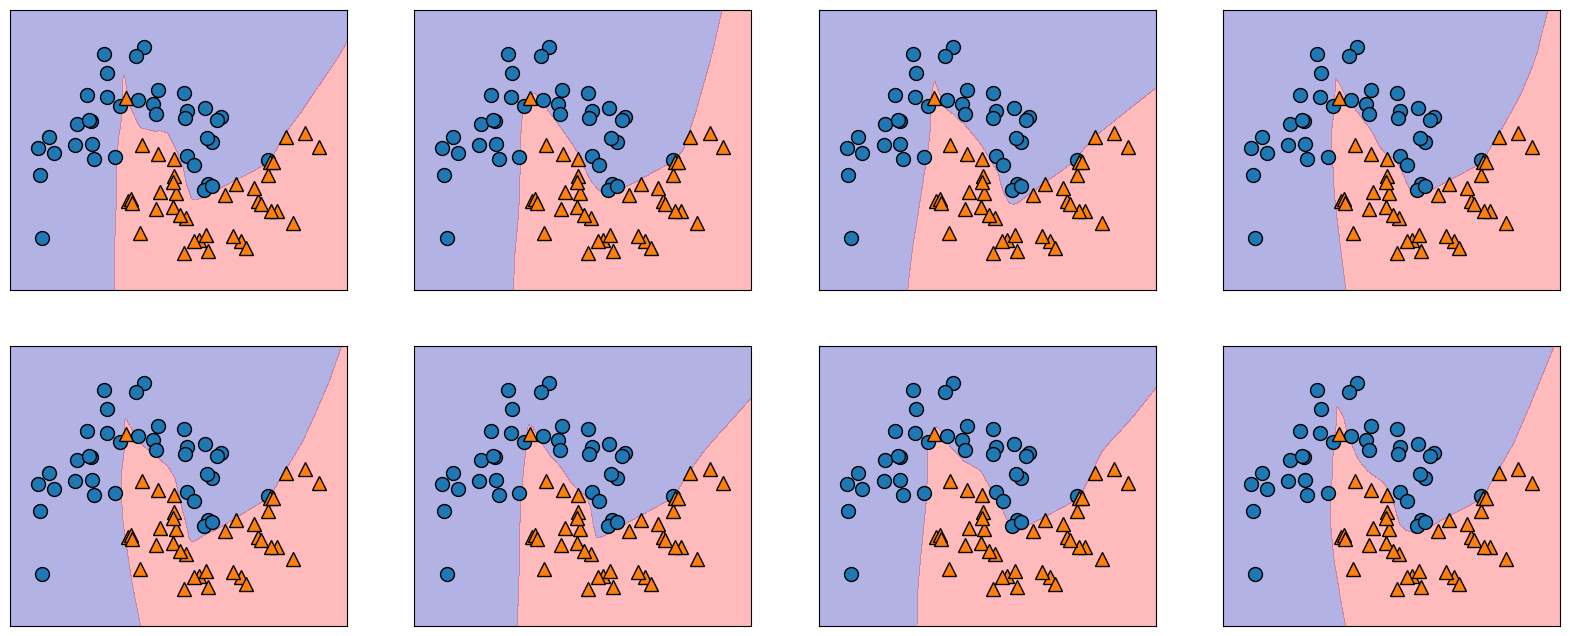

In [129]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, # 초기화를 달리한 모델
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [130]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train))) # 데이터 스케일이 정확도 성능에 영향을 준다 
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [132]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0) # MLPClassifier에서 alpha의 기본값은 0.0001
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) #경고 출력 > 최대 반복 횟수에 도달 > 반복횟수를 늘려야

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [133]:
mlp = MLPClassifier(max_iter=1000, random_state=0) # 반복횟수를 늘림
# MLPClassifier에서 alpha의 기본값은 0.0001
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 일반화 성능이 떨어짐

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [134]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0) # 모델의 복잡도는 낮추기 위해 알파값   0.0001 > 1로 크게 증가 
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))# 가장 좋은 모델의 성능

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [135]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1) # 모델의 가중치 편차와 분산 

(array([0.02559193, 0.04066835, 0.03308025, 0.03081333, 0.01669964,
        0.01838658, 0.03626209, 0.04066151, 0.02432519, 0.01737967,
        0.05508384, 0.01659837, 0.04014836, 0.036805  , 0.0131538 ,
        0.03408178, 0.01182728, 0.015795  , 0.01424585, 0.02966082,
        0.04854174, 0.05185808, 0.04186009, 0.04332929, 0.03185674,
        0.01475534, 0.04066124, 0.04863656, 0.03751535, 0.0262638 ]),
 array([0.00065495, 0.00165391, 0.0010943 , 0.00094946, 0.00027888,
        0.00033807, 0.00131494, 0.00165336, 0.00059171, 0.00030205,
        0.00303423, 0.00027551, 0.00161189, 0.00135461, 0.00017302,
        0.00116157, 0.00013988, 0.00024948, 0.00020294, 0.00087976,
        0.0023563 , 0.00268926, 0.00175227, 0.00187743, 0.00101485,
        0.00021772, 0.00165334, 0.00236552, 0.0014074 , 0.00068979]))

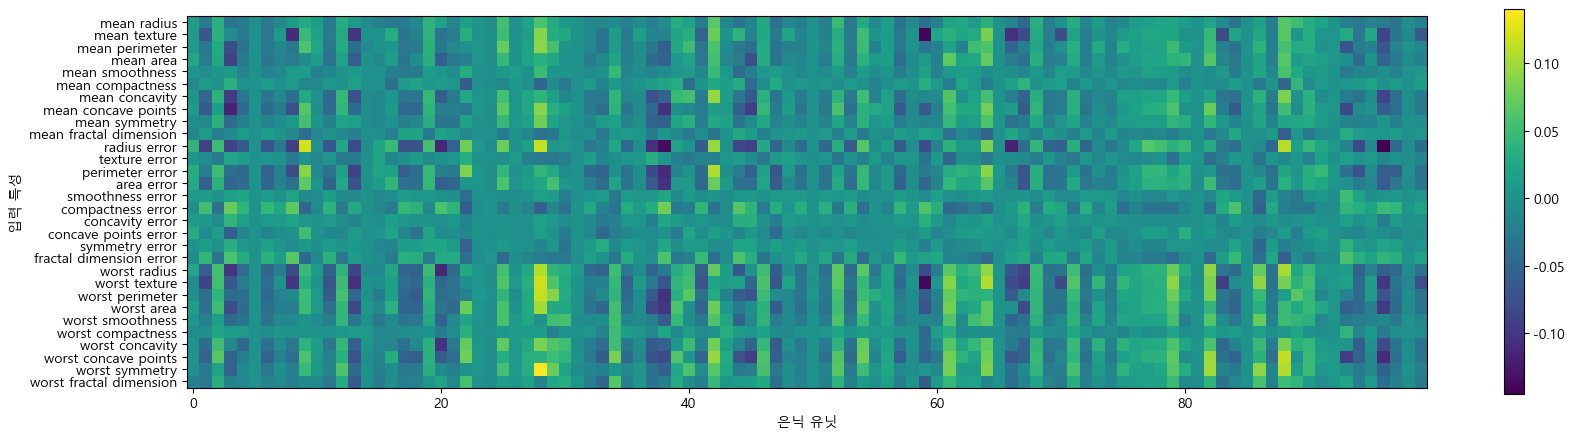

In [136]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛") # 은닉층의 가중치들
plt.ylabel("입력 특성") # 30개의 입력 특성
plt.colorbar()
plt.show() # 책에는 없음

#### 장단점과 매개변수

- 신경망 장점
  > 대량의 데이타에 대한 복잡한 모델 구현

- 신경망 단점
  > 학습 오래 걸린다

  > 데이터 전처리에 주의 필요 > 신경만 매개변수 튜닝은 예술에 가깝다

#### 신경망의 복잡도 추정
- 가장 중요한 매개변수: 은닉층 개수와 각 은닉층의 유닛 수

- 신경망 모델의 복잡도:

  > 특성 100개, 은닉 유닛수 100개 > 100* 100 + 100 = 10,1001 가중치 ... > 170페이지 하단 문단과 171페이지 첫째 문단 이해

- 신경망 매개변수 조정하는 일반적인 방법:
  > 과대적합된 큰 모델을 먼저 만든다

  > 신경망 구조를 줄이거나 알파값 증가시켜 일반화 성능을 향상시킨다

solver 매개변수 사용하여 모델 학습 방법을 지정: 교재 171페이지 보충:

- Adam, LBFGS, SGD는 모두 **딥러닝 모델의 손실 함수(loss function)를 최소화하기 위해 사용하는 최적화 알고리즘(optimizer)**

- 모두 경사하강법(Gradient Descent) 기반으로 모델의 가중치를 조금씩 바꿔가며 **손실(loss)**을 줄이는 방향으로 학습

-  SGD (Stochastic Gradient Descent): 전체 데이터가 아닌, 한 샘플 또는 미니배치 단위로 경사를 계산하고 업데이트 > 고급 옵션

- Adam (Adaptive Moment Estimation): SGD + 모멘텀 + RMSprop 개념을 결합한 고급 최적화 알고리즘- 대부분 잘 작동 >데이터 스케일에 민감

- L-BFGS (Limited-memory BFGS): 고전적인 준-뉴턴법 기반 최적화, 소규모 문제에서는 빠르고 정확함 > 큰 모델/대량 데이터세트 시간 걸림

## 2.4 분류 예측의 불확실성 추정

- scikit-learn 인터페이스: 분류기에 예측의 불확실성을 추정할 수 있는 기능

  > decision_function: 모델의 결정 경계로부터의 거리를 반환 > 절댓값이 클수록 모델이 더 확신하고 있다는 뜻

  > predict_proba: 각 클래스에 속할 추정 확률 반환 > 0.5 이상이면 해당 클래스 예측(이진분류)

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### 2.4.1 결정 함수

In [138]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape) # 각 샘플이 하나의 실수 값을 반환

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [139]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])#양수는 양성 클래스, 음수는 음성 클래스

결정 함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [140]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [141]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero] #음성 클래스: classes_ 속성의 첫번째 원소 [0], 양성클래스는 classes_[1]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


In [142]:
decision_function = gbrt.decision_function(X_test) # 값의 범위
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


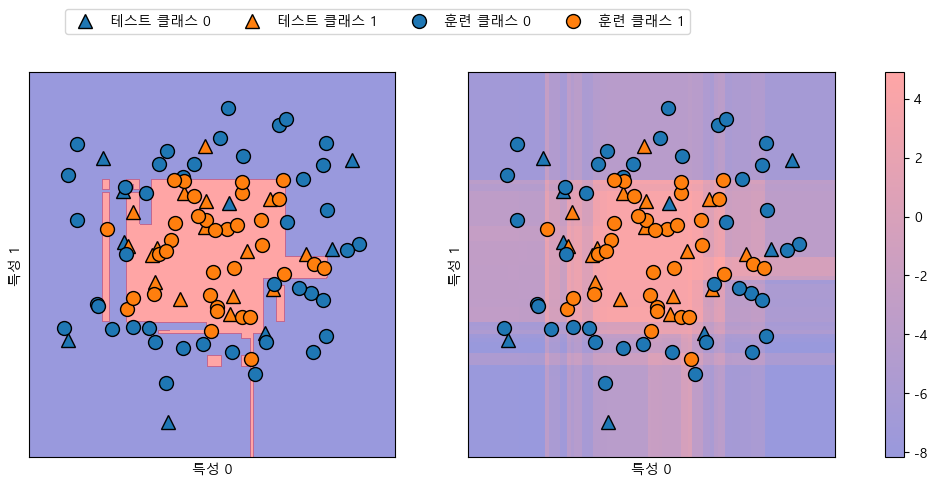

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2) # 분류기의 결정 경계
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl) #분류기의 결정 점수(decision_function 또는 predict_proba 값)를 색상으로 표현
# 색이 진할수록 모델의 확신이 강하고, 경계 근처에서는 색이 옅음
for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

### 2.4.2 예측 확률

- 각 클래스에 대한 확률

In [144]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape) #(25,2) 25는 샘플수, 2는 첫번째 클래스, 두번째 클래스의 예측 확률

확률 값의 형태: (25, 2)


In [145]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6])) # 각 샘플별 두 클래스의 합은 1

Predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


데이터에 있는 불확실성이 두 클래스의 확률 값에 잘 반영되는지는 모델과 매개변수 설정에 달려 있다

- 복잡도 낮은 모델은 예측에 불확실성이 더 많다

- 불확실성과 모델의 정확도가 동등하면 모델이 보정(calibration)되었다고 한다 

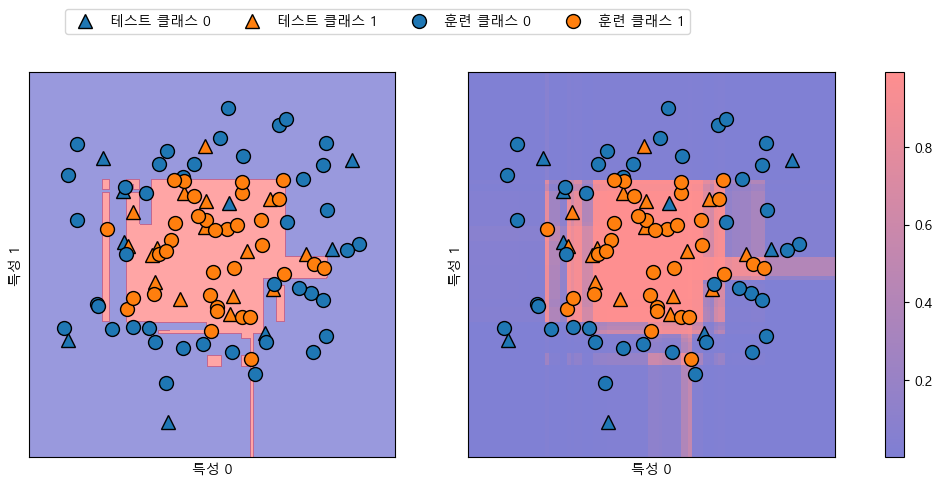

In [146]:
#결정 경계와 클래스 1의 확률
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
fig.draw_without_rendering()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

scikit-learn의 여러 분류기 비교
- RBF SVM과 랜덤 포레스트, 신경망

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

### 2.4.3 다중 분류에서의 불확실성

In [147]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [148]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape) #(38,3) 3개의 클래스
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


In [149]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [150]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [151]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [152]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)# argmax 함수를 적용하여 예측 결과를 재현
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 요약 및 정리

- 모델 복잡도 > 일반화

  > 과대적합, 과소적합

- 머신러닝 모델: 182페이지 하단 ~ 183페이지 상단:

  > 최근접   이웃 ~ 신경망

- 새로운 데이터세트 학습 방법

  > 선형 모델로 시작

  > 랜덤포레스트 또는 그래이언트 부스팅, SVM, 신경망 모델로 정확도 향상